# Final Project - Predicting How People Feel About Artifical Intelligence





![](https://specials-images.forbesimg.com/imageserve/684285598/960x0.jpg?fit=scale)

## Marie Anselmi

**The American University of Paris**

a98632

This project was prepared for Fundamental Methods of Data Science (CS 2091) taught by Professor Libal.

## Introduction

My question for this project was "How likely is someone to have positive feelings about artifical intelligence?" I conducted a [survey](https://docs.google.com/forms/d/e/1FAIpQLSe0RcjhkNJfvI9VQlb_GDlUxRMc4dNZHXJzI2iON5cYUp4C3A/viewform?usp=sf_link) of **122** individuals to answer this question, collecting 15 original features and the target feature of a overall sentiment score. My initial hypothesis is that people who know more about artificial intelligence will have more positive/optimistic feelings toward AI. As H.P. Lovecraft said, “The oldest and strongest emotion of mankind is fear, and the oldest and strongest kind of fear is fear of the unknown.”

It is important to note that my survey was spread not only to the aquantainces I am in contact with via the internet, but also to two online communities of software engineers, developers, free software enthusiasts, and system administrators. This volunteer convenience sample shifted the demographics of my data and probably doesn't represent the general population very well.

**Disclaimer:** I know absolutely nothing about collecting data or creating surveys. Many comments pointed this out and the difficulty of my analysis confirms it. The purpose of the survey was merely to collect original data related to my unique question, rather than finding data and formulating a target feature based on the existing data.

### Initial Features
* Age - years


* Gender - Male, Female, Other/Prefer not to say


* Education - years completed


* Academic - academic/occupational field, inspired by [this Wikipedia page](https://en.wikipedia.org/wiki/Outline_of_academic_disciplines)
    * Arts (Visual, Performing, etc)
    * Humanities (History, Geography, Philosophy, Languages and Literature, etc)
    * Social Sciences (Anthropology, Psychology, Economics, Law, Political Science, etc)
    * Natural Sciences (Biology, Chemistry, Physics, etc)
    * Formal Sciences (Computer Science, Mathematics, Statistics, etc)
    * Applied Sciences (Engineering, Health Sciences, etc)
    * Other (Business, Marketing, Education, etc)
    * N/A
    
    
* Political: 1-7 scale with 1 being very liberal and 7 very conservative


* AI - (1-5) overall self rating of how informed individuals feel about AI in general


* Intelligence - What they believed was the best definition of intelligence
    * "The ability to acquire and apply knowledge and skills." - [Merriam-Webster](https://www.merriam-webster.com/dictionary/intelligence)
    * "The computational part of the ability to achieve goals in the world. Varying kinds and degrees of intelligence occur in people, many animals and some machines." - [John McCarthy](http://www-formal.stanford.edu/jmc/whatisai/node1.html)
    * "A true sign of intelligence is not knowledge but imagination." - [Albert Einstein](https://www.brainyquote.com/photos_tr/en/a/alberteinstein/148802/alberteinstein1-2x.jpg)
  
  
* AI1 - Best definition of AI
    * "The science and engineering of making intelligent machines, especially intelligent computer programs. It is related to the similar task of using computers to understand human intelligence, but AI does not have to confine itself to methods that are biologically observable." - [John McCarthy](http://www-formal.stanford.edu/jmc/whatisai/node1.html)
    * "The simulation of human intelligence processes by machines, especially computer systems." - [Article](http://searchcio.techtarget.com/definition/AI)
    * "The theory and development of computer systems able to perform tasks normally requiring human intelligence, such as visual perception, speech recognition, decision-making, and translation between languages." - [Oxford Dictionary](https://en.oxforddictionaries.com/definition/artificial_intelligence)
    * Other


* AI2 - Daily contact with AI (Y/N)


* VA - Did participants use virtual assistants frequently (Y/N)


* Tests - Select familiarity with [Turing test](https://en.wikipedia.org/wiki/Turing_test), [Winograd Schema Challenge](http://commonsensereasoning.org/winograd.html), [COPA](http://people.ict.usc.edu/~gordon/copa.html), or None


* AI3 - Best representation of AI, ranging from Chatbots to Robots to Commonsense Reasoning to all
    * Not the most complete or accurate list. Finding general information about what technology uses AI is incredibly difficult, and understanding AI well requires much more research then I could conduct. 
    

* AI4 - Chose the true statements out of:
    * "Artificial intelligence seeks to model and replicate the processes of human cognition."
    * "Artificial intelligence seeks to mimic human responses."

* Films - Number of [films](https://en.wikipedia.org/wiki/List_of_artificial_intelligence_films) seen containing AI
    * Note: the [list](https://en.wikipedia.org/wiki/List_of_artificial_intelligence_films) provided as a reference contained movies such as *Star Wars*, that don't contain much more AI than our day to day lives at this point and might not come to mind if people didn't look at the list. For example my score was much higher (11) than most respondents'(median = ). I wouldn't normally rate myself as having seen many AI films (*The Matrix* is the only one off the top of my head), but after looking at the list that number went up. Essentially this feature might not be very accurate depending on whether or not people actually looked at the list provided.


* Other - Short answer section for participants to indicate any other information they felt relevant


The **target feature** was Sentiment, an overall attitude score (1-7) about AI.


**Note:** Most of my features was created to assess participants knowledge of AI, as is discussed in more depth in the [Feature Engineering](#Feature-Engineering) section.



## Data Analysis




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('./Data Science Final Project Data Collection (Responses) - Form Responses 1-5.csv')


del data['Timestamp']
data.head()

,Age,Gender,Academic,Political,Education,Intelligence,Tests,AI1,AI3,AI,Films,Sentiment,AI2,VA,Other,AI4
0,19,Female,"Formal Sciences (Computer Science, Mathematics...",4,15,"2. ""The computational part of the ability to a...","Turing Test, Winograd Schema Challenge, Choice...","1. ""The science and engineering of making inte...",All,4,11,6,Yes,No,0,"""Artificial intelligence seeks to mimic human ..."
1,18,Female,"Social Sciences (Anthropology, Psychology, Eco...",1,13,"1. ""The ability to acquire and apply knowledge...",Turing Test,"2. ""The simulation of human intelligence proce...","Reactive Machines (Deep Blue, AlphaGo, etc)",3,4,5,No,Yes,NaN,"""Artificial intelligence seeks to model and re..."
2,22,Female,"Formal Sciences (Computer Science, Mathematics...",3,17,"2. ""The computational part of the ability to a...",Turing Test,"1. ""The science and engineering of making inte...","Reactive Machines (Deep Blue, AlphaGo, etc)",4,2,5,Yes,Yes,NaN,"""Artificial intelligence seeks to mimic human ..."
3,45,Female,"Formal Sciences (Computer Science, Mathematics...",2,17,"1. ""The ability to acquire and apply knowledge...",None,"3. ""The theory and development of computer sys...","Personal Assistants (Siri, Alexa, Cortana, etc)",2,5,3,No,Yes,NaN,"""Artificial intelligence seeks to model and re..."
4,19,Female,"Social Sciences (Anthropology, Psychology, Eco...",2,13,"2. ""The computational part of the ability to a...",None,"1. ""The science and engineering of making inte...","Humanoid Robots (Sophia, Asimo, HPR-4, NAO, etc)",2,2,4,No,No,NaN,"""Artificial intelligence seeks to mimic human ..."


### Cleaning
Most of my dataset feature inputs are strings, so let the cleaning commence.

In [2]:
data=data.replace('Yes', True)
data=data.replace('No', False)
#assigning specific variables to various responses 
data= data.replace('Arts (Visual, Performing, etc)',0)
data= data.replace('Humanities (History, Geography, Philosophy, Languages and Literature, etc)',1)
data= data.replace('Social Sciences (Anthropology, Psychology, Economics, Law, Political Science, etc)',2)
data= data.replace('Natural Sciences (Biology, Chemistry, Physics, etc)',3)
data= data.replace('Formal Sciences (Computer Science, Mathematics, Statistics, etc)',4)
data= data.replace('Applied Sciences (Engineering, Health Sciences, etc)',5)
data= data.replace('Other (Business, Marketing, Education, etc)',6)
data= data.replace('N/A',7)

data= data.replace('None',0)
data= data.replace('Turing Test' or 'Winograd Schema Challenge',1)
data=data.replace('Choice of Plausible Alternatives (COPA)',1)
data= data.replace('Turing Test, Winograd Schema Challenge',2)
data=data.replace('Turing Test, Choice of Plausible Alternatives (COPA)' or 'Winograd Schema Challenge, Choice of Plausible Alternatives (COPA)',2)
data= data.replace('Turing Test, Winograd Schema Challenge, Choice of Plausible Alternatives (COPA)',3)

#for most other features, simply casting to catagories is adaquate
data['Intelligence'] = data['Intelligence'].astype('category').cat.codes
#McCarthy quote = 0, random article = 1, Oxford dictionary = 2
data['AI1'] = data['AI1'].astype('category').cat.codes
#all=0, chatbots=1, commonsense reasoning=2, robots=3, PAs=4, reactive machines=5
data['AI3'] = data['AI3'].astype('category').cat.codes
#note - red herring response=1
data['AI4'] = data['AI4'].astype('category').cat.codes
data=data.fillna(0)
#one of the 'Other' responses was "0", but I just want to see if people responded or not
data['Other']=data.apply(lambda x: False if x['Other']==0
                        else True, axis = 1)
data.head()

,Age,Gender,Academic,Political,Education,Intelligence,Tests,AI1,AI3,AI,Films,Sentiment,AI2,VA,Other,AI4
0,19,Female,4.0,4,15,1,3,0,0,4,11,6,True,False,True,0
1,18,Female,2.0,1,13,0,1,1,8,3,4,5,False,True,False,1
2,22,Female,4.0,3,17,1,1,0,8,4,2,5,True,True,False,0
3,45,Female,4.0,2,17,0,0,2,7,2,5,3,False,True,False,1
4,19,Female,2.0,2,13,1,0,0,4,2,2,4,False,False,False,0


### Initial Data Exploration

In [3]:
data.describe()

,Age,Academic,Political,Education,Intelligence,Tests,AI1,AI3,AI,Films,Sentiment,AI4
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,38.745902,3.549180,3.327869,15.639344,0.721311,1.032787,1.180328,3.868852,3.467213,73.737705,4.721311,0.737705
std,16.989331,1.730153,1.673531,2.736547,0.774194,0.890115,0.852962,3.330180,1.061610,458.907268,1.522624,0.441696
min,15.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,23.250000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,3.000000,6.250000,4.000000,0.000000
50%,36.500000,4.000000,3.000000,16.000000,1.000000,1.000000,1.000000,4.000000,4.000000,19.000000,5.000000,1.000000
75%,50.000000,5.000000,4.000000,17.750000,1.000000,1.000000,2.000000,7.000000,4.000000,39.250000,6.000000,1.000000
max,100.000000,6.000000,7.000000,23.000000,2.000000,3.000000,2.000000,11.000000,5.000000,5000.000000,7.000000,1.000000


So we can see we have 122 individuals, the mean age is 38.7, mean level of education is some college (15.64), mean number of AI containing films is 73.73, and mean sentiment is 4.7, so slightly positive. For all the other features, the values are mostly just replacements for string responses, so they don't really represent anything.

In [4]:
data.corr()

,Age,Academic,Political,Education,Intelligence,Tests,AI1,AI3,AI,Films,Sentiment,AI2,VA,Other,AI4
Age,1.000000,0.238431,0.199449,0.190172,0.085680,0.114228,0.105843,-0.091744,0.245827,0.309776,0.152827,0.015960,0.003145,0.199038,0.098975
Academic,0.238431,1.000000,0.125682,0.101527,0.034997,0.176036,0.117144,0.008301,0.057129,0.076095,0.180927,-0.018189,0.095623,-0.037258,0.135979
Political,0.199449,0.125682,1.000000,-0.004645,0.122136,-0.057208,0.056663,-0.100473,-0.031113,0.024799,0.003722,-0.026360,0.042575,-0.074883,0.083761
Education,0.190172,0.101527,-0.004645,1.000000,0.045787,0.086323,-0.014395,0.074571,0.121066,-0.484445,-0.010437,0.019612,-0.080379,0.216004,-0.017374
Intelligence,0.085680,0.034997,0.122136,0.045787,1.000000,-0.082573,-0.060934,0.056228,-0.051431,-0.084903,-0.143550,0.038472,-0.027191,0.133220,0.050317
Tests,0.114228,0.176036,-0.057208,0.086323,-0.082573,1.000000,-0.105819,-0.059875,0.499662,0.185915,0.299494,0.162572,0.093085,0.046722,0.127157
AI1,0.105843,0.117144,0.056663,-0.014395,-0.060934,-0.105819,1.000000,0.049128,-0.048178,-0.007606,-0.005529,-0.021413,0.099987,-0.068910,-0.026971
AI3,-0.091744,0.008301,-0.100473,0.074571,0.056228,-0.059875,0.049128,1.000000,-0.038629,-0.036206,-0.020307,-0.065728,0.098225,-0.141367,-0.006724
AI,0.245827,0.057129,-0.031113,0.121066,-0.051431,0.499662,-0.048178,-0.038629,1.000000,0.156677,0.270391,0.251180,0.092538,0.207756,0.052008
Films,0.309776,0.076095,0.024799,-0.484445,-0.084903,0.185915,-0.007606,-0.036206,0.156677,1.000000,0.119957,-0.131604,0.114109,-0.075870,0.023387


Interesting. So right off the bat, we can see that the feature with the strongest correlation to Sentiment is 'Tests'. So the more AI tests people have heard of the more positive their sentiment. We also see that whether or not people know they have contact with AI every day ('AI2') has a strong correlation as well as 'Films'.

I had initially hypothesized that 'Films' would have a negative correlation, which was originally true when I had fewer responses, but apparently not overall. This could generally be true, but my sample may not represent it. I.e. many of my participants are American techies, buddies of my software engineer IT consultant father, so they probably aren't worried about AI, and absolutely have watched a lot of sci-fi films (fortunately I tagged along to enough conferences and meetings as a kid to know that much).

### Visualization and Data Distribution

In this section I'm going to look at the distribution of all my features. Note that many of them are addressed in more detain in the feature engineering section of this project. 

Text(0.5,1,'Gender Proportions\n')

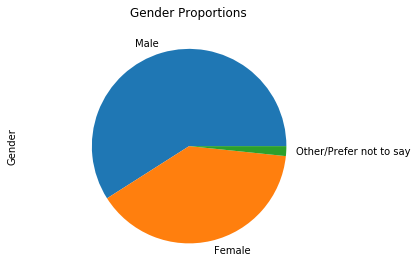

In [5]:
data.Gender.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Gender Proportions' + '\n')

The majority of my poplation is male, which is interesting, initially unexpected, and probably unfortunate, but we'll see. Anyway, now I have to turn this feature numerical to do much else with it, including calculating percentages as below.

In [6]:
data['Gender'] = data['Gender'].astype('category').cat.codes

counts = np.bincount(data['Gender']).astype(float)
print('Female percentage: ' + str((counts[0]/len(data))*100) + '%' + '\n')
print('Male percentage: ' + str((counts[1]/len(data))*100)+'%' + '\n')
print('Other/Prefer not to say percentage: ' + str((counts[2]/len(data))*100)+'%' + '\n')


Female percentage: 39.3442622951%

Male percentage: 59.0163934426%

Other/Prefer not to say percentage: 1.6393442623%



Now let's look at my age spread.

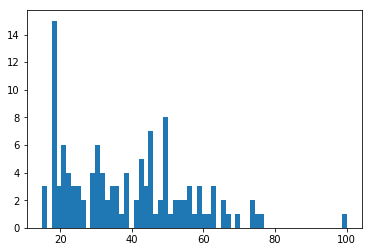

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

_ = plt.hist(data['Age'], 63)


This is a pretty wide age range (*15*-*100*) as we can see from the desciption table up above. There's not really an clear seperation, but let's see what I can do.

Also, I don't believe a 100 year old took my suvey, so let's pick on that one for a moment.

In [8]:
data[data['Age']==100]

,Age,Gender,Academic,Political,Education,Intelligence,Tests,AI1,AI3,AI,Films,Sentiment,AI2,VA,Other,AI4
84,100,2,5.0,4,1,0,3,1,2,5,5000,7,False,True,False,1


So it's not terribly apparent here in the cleaned data, but this particular case was just someone messing around when they took the survey. For one, I hope that 5000 films containing AI haven't been made, and I certainly hope no one's watched 5000 films over the course of their life. Lastly, I think a real 100 year old has better things to do with their time than take surveys about AI, much less watch 5000+ movies. 

At the moment, I'm not going to worry about this "fake" instance. There are outliers in every dataset, and this one is so outrageous that hopefully it won't mess up my models.

Anyway, my next feature to look at is Education.

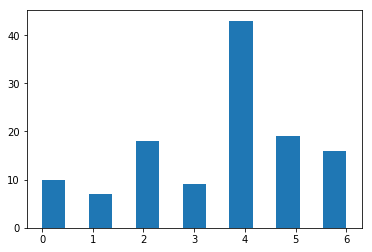

In [9]:
_ = plt.hist(data['Academic'], 13)

Most of my individuals were in the academic field 4, which corresponds to formal sciences, such as mathematics, statistics, computer science, etc. Unsurprising, considering who my survey was distributed to.

On to political standing.

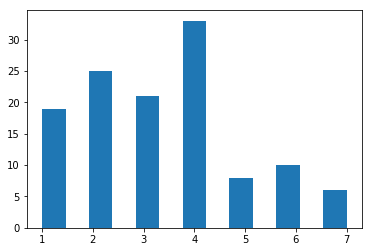

In [10]:
_ = plt.hist(data['Political'], 13)

So most people consider themselves neutral. Very few overall consider themselves on the conservative end of the scale, interesting.

On to years of education.

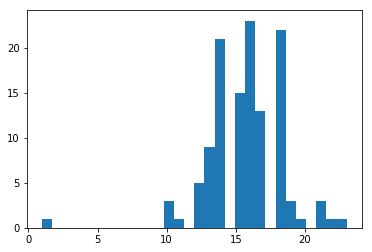

In [11]:
_ = plt.hist(data['Education'], 30)

So most individuals have a decent amount of education.



The feature 'Intelligence' corresponds to a question asking participants to choose what they thought was the best definition of intelligence. 0 was a standard dictionary definition, 1 was a McCarthy quote, and 2 was a quote attributed to Albert Einstein that wasn't really a definition, see the introduction for the link to the specific quote.

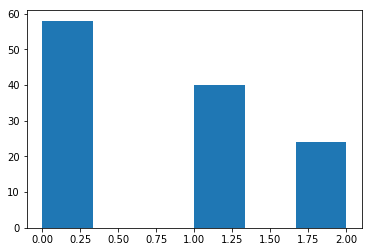

In [12]:
_ = plt.hist(data['Intelligence'], 6)

Most people picked the stadard definition.

'Tests' corresponded to what artificial intelligence tests respondents had heard of out of the [Turing test](https://en.wikipedia.org/wiki/Turing_test), [Winograd Schema Challenge](http://commonsensereasoning.org/winograd.html), [COPA](http://people.ict.usc.edu/~gordon/copa.html), and None. When I cleaned my data, I fixed this feature up so that 0 means none of the tests, 1 means one of the three, and so on. Again see the introduction for specifics about the original feature.

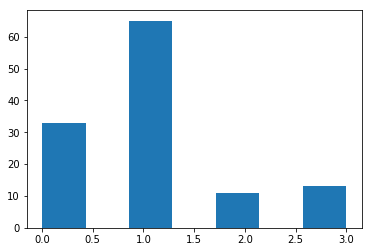

In [13]:
_ = plt.hist(data['Tests'], 7)

One test out of the three is the most common, which makes sense probability wise.



'AI1' corresponds to responses picking the best definition of artificial intelligence. 0 was a McCarthy quote, while 1 and 2 were standard dictionary quotes.

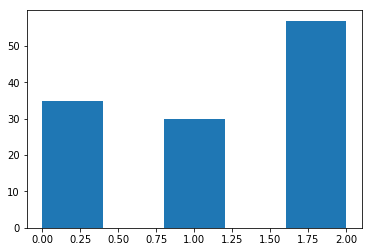

In [14]:
_ = plt.hist(data['AI1'], 5)

Interesting, apparently most people prefered one of the dictionary definitions.


'AI3' was asking people what they thought was the best example/representation of AI was out of an incomplete and simplified list.

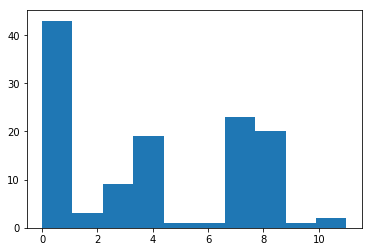

In [15]:
_ = plt.hist(data['AI3'], 10)

Most people answered all, which is the "right" option. However reactive machines, humanoid robots, and virtual assistants were also popular options.



'AI' was a 1-5 ranking of how informed participants felt about AI overall.

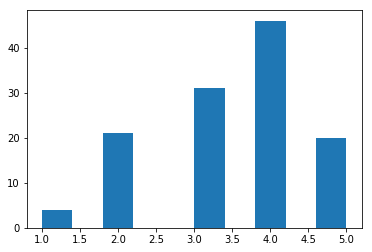

In [16]:
_ = plt.hist(data['AI'], 10)

As we can see, most people thought they were relatively informed, which isn't surprising.

'AI2' was one of my red herring features. I asked people if they had contact with AI in every day life. From my brief research on the topic, if you use Google or have a credit card or a smart phone you have contact with AI.

Text(0.5,1,'Contact with AI Proportions\n')

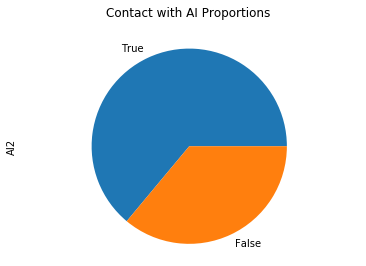

In [17]:
data.AI2.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Contact with AI Proportions' + '\n')

As we can see most people got it right and recognize that they do have contact with AI already. However a decent amount did not know 

Text(0.5,1,'Daily Use Of Virtual Assistant Proportions\n')

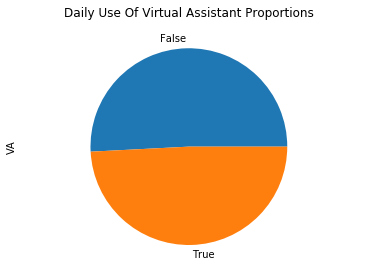

In [18]:
data.VA.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Daily Use Of Virtual Assistant Proportions' + '\n')

So about half of my respondents use VAs like Siri and Cortana frequently. Perfect.

Almost finished, let's look at who chose to elaborate on their responses.

Text(0.5,1,'Other Proportions\n')

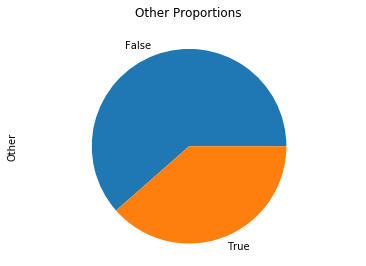

In [19]:
data.Other.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Other Proportions' + '\n')

So most people didn't write any other thoughts they had on AI.

Now let's see how many films my participants had watched.

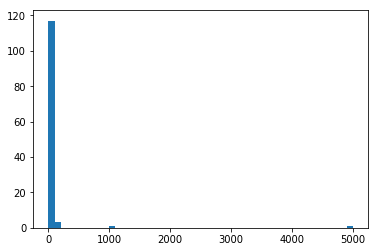

In [20]:
_ = plt.hist(data['Films'], 50)

Due to some outliers, it's hard to visualize this data very well, but I'll go into normalizing it in feature engineering.

And finally we have our target feature.

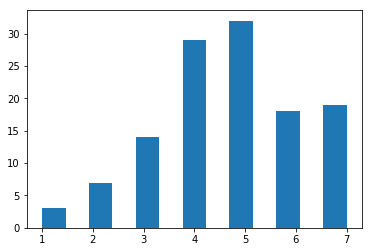

In [21]:
_ = plt.hist(data['Sentiment'], 13)

The majority of people feel neutrally or positively about AI, which is interesting/promising. I wonder how much sample bias played into this. 

So now that we've looked at the distribution of all our features, we can start manipulating them.
### Feature Engineering

#### 'AI' Verification
My initial bias asking my question: "How do people feel about AI?" was that while I don't know what the overall sentiment will be, I think having a lower sentiment will correlate with a lower knowledge base. I.e. People who are afraid/pessemistic about AI will also not know as much about the topic. The people I've seen freaking out on social media about the [Sophia](http://sophiabot.com) robot that's been in the news recently tend to cite popular science fiction films as the primary, and often only, reason why AI is bad. However I don't nessesarily trust people to accurately rate the extent of their own knowledge. To attempt to combat this, there are several features in the dataset that were collected with the intent of providing some assesment of how much participants actually knew about AI and to investigate whether their self assessment scores (the feature 'AI') differed.

The features solely created for this purpose were:
* 'Intelligence' - Choosing between 3 definitions of intelligence
    * [One](https://www.brainyquote.com/photos_tr/en/a/alberteinstein/148802/alberteinstein1-2x.jpg) of the options wasn't actually a definition.


* 'AI2'- Do you have contact with AI daily? Y/N 
    * People don't always realize how much AI is already integrated into our lives, so by selecting that they do not have daily contact with AI they indicate that they are either off-the-grid, or don't have an extensive knowledge base.

* 'AI4'
    * One option descibed artifical intelligence, while the other descibes [computational modeling](http://s3-euw1-ap-pe-ws4-cws-documents.ri-prod.s3.amazonaws.com/9781848724167/Chapter%201_summary.pdf), a subfield of cognitive psychology. However the answers were potentially written poorly, misleading most people to pick the wrong answer.
    
While there are other features I intend to utilize in feature engineering and to assess knowledge base capacity, the three listed here are those I intentionally created with that primary purpose.


First I'm going to smooth out my data, then I'll work with my red herring responses.

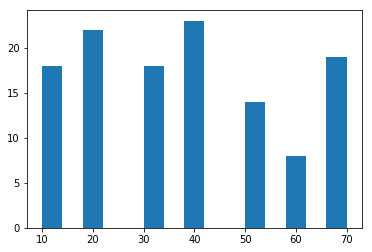

In [22]:
data['age_cats'] = data.apply(lambda x: 10 if x['Age'] < 20
         else 20 if x['Age'] > 20 and x['Age'] < 30
         else 30 if x['Age'] > 30 and x['Age'] < 40
         else 40 if x['Age'] > 40 and x['Age'] < 50
         else 50 if x['Age'] > 50 and x['Age'] < 60
         else 60 if x['Age'] > 60 and x['Age'] < 70
         else 70, axis = 1)
#I can cut it off here because I know my max age is 75
_ = plt.hist(data['age_cats'], 15)

Again, interesting. It's a pretty diverse dataset when we look at age. I honestly didn't think I would have the most responses from 40 year olds, but the techies came through. According to [this article](https://en.wikipedia.org/wiki/List_of_countries_by_median_age) the median age of the United States is 37.9 and the EU is 42.7. This data probably isn't terribly representative of the world as a whole, but the age for western countries isn't bad.

Because these catagories are still not very comprehensive, I'm going to break it down by generation as well. Generation cut year ranges were informed by [this article](https://en.wikipedia.org/wiki/Generation#List_of_generations).


Gen Z Percentage: 4.91803278689%

Millennials Percentage: 47.5409836066%

Gen X Percentage: 28.6885245902%

Baby Boomer Percentage: 17.2131147541%

Silent Generation Percentage: 0.819672131148%

GI Generation Percentage: 0.819672131148%



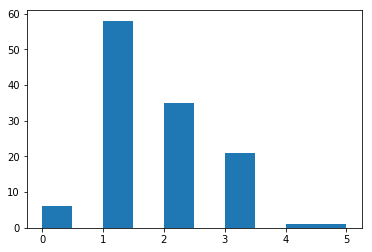

In [23]:
#To make generation splits easier I'm going to calculate birth year first
data['brth_yr'] = data.apply(lambda x: 2017 - x['Age'], axis = 1)
data['gen'] = data.apply(lambda x: 5 if x['brth_yr'] < 1924
        #silent generation
         else 4 if x['brth_yr'] > 1924 and x['brth_yr'] < 1942
        #baby boomers
         else 3 if x['brth_yr'] > 1942 and x['brth_yr'] < 1964
        #Gen X
         else 2 if x['brth_yr'] > 1964 and x['brth_yr'] < 1980
        #milenials
         else 1 if x['brth_yr'] > 1980 and x['brth_yr'] < 2000
        #gen z
         else 0, axis = 1)
#I can cut it off here because I know my max age is 100 (even though that response is fake)

data= data.drop(['age_cats', 'brth_yr'], axis=1)

counts = np.bincount(data['gen']).astype(float)
print('\n'+'Gen Z Percentage: ' + str((counts[0]/len(data))*100) + '%' + '\n')
print('Millennials Percentage: ' + str((counts[1]/len(data))*100)+'%' + '\n')
print('Gen X Percentage: ' + str((counts[2]/len(data))*100)+'%'+ '\n')
print('Baby Boomer Percentage: ' + str((counts[3]/len(data))*100)+'%'+ '\n')
print('Silent Generation Percentage: ' + str((counts[4]/len(data))*100)+'%'+ '\n')
print('GI Generation Percentage: ' + str((counts[5]/len(data))*100)+'%'+ '\n')


_ = plt.hist(data['gen'], 10)

So the majority of my respondents were millennials, but I've got a decent spread. I like this way of smoothing my data more than my previous age catagories. It looks like about half of my respondents are millennials, so making that a feature will probably be more interesting.

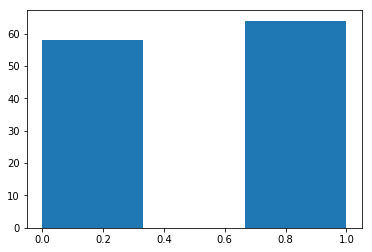

In [24]:
data['yng']= data.apply(lambda x: True if x['gen']<=1
                       else False, axis=1)
_ = plt.hist(data['yng'], 3)

More "young" people than old, but it's really very close. Letting the cuttoff for being "young" be 37 is probably risky if this analysis is ever shared beyond our class, but I'm not going to worry about it.

Let's move on to Sentiment.

4.721311475409836


5.0

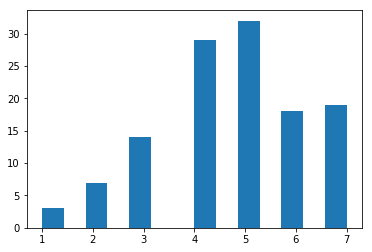

In [25]:
_ = plt.hist(data['Sentiment'], 14)
print(data['Sentiment'].mean())
data['Sentiment'].median()

As we already knew most of my individuals are neutral or slightly positive/optimistic when it comes to AI. However my analysis will be easier if my target feature is a boolean, so I'm going to keep messing with it.

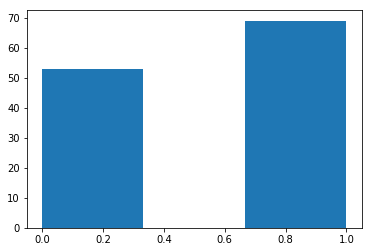

In [26]:
data['Pos']= data.apply(lambda x: True if x['Sentiment']>4
                       else False, axis=1)
_ = plt.hist(data['Pos'], 3)

If I count the neutral responses as "negative" sentiment, there is still less negative sentiment than positive, but overall they're pretty balanced. Since I don't think neutral counts as negative though, I'm going to keep playing with it.

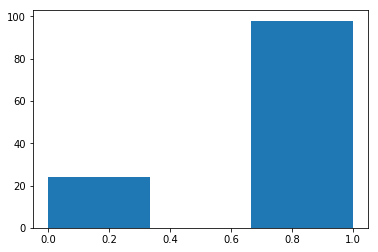

In [27]:
data['~Neg']= data.apply(lambda x: True if x['Sentiment']>=4
                       else False, axis=1)
_ = plt.hist(data['~Neg'], 3)

If I consider neutral to be positive there's a vast difference. However based on the original histogram I made I still don't think that's the right approach either.

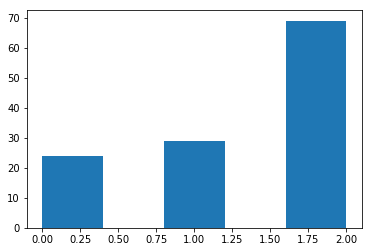

In [28]:
data['sent_cats']= data.apply(lambda x: 0 if x['Sentiment']<4
                              else 1 if x['Sentiment']==4
                               else 2 , axis=1)
_ = plt.hist(data['sent_cats'], 5)

Okay, that's a little better. Now we can see that there are overwhelmingly more people who have positive feelings about AI than negative or neutral (though this is not surprising, as the neutral catagory includes only one rating, 4, while positive and negative both contain 3 possible ratings).

In [29]:
data.corr()

,Age,Gender,Academic,Political,Education,Intelligence,Tests,AI1,AI3,AI,...,Sentiment,AI2,VA,Other,AI4,gen,yng,Pos,~Neg,sent_cats
Age,1.000000,0.489081,0.238431,0.199449,0.190172,0.085680,0.114228,0.105843,-0.091744,0.245827,...,0.152827,0.015960,0.003145,0.199038,0.098975,0.840522,-0.789390,0.133440,0.096156,0.131885
Gender,0.489081,1.000000,0.204698,0.076826,0.077956,0.003705,0.295040,0.061456,0.090607,0.352029,...,0.242189,-0.019471,-0.075330,-0.009073,0.213738,0.409387,-0.344810,0.256222,0.037895,0.179526
Academic,0.238431,0.204698,1.000000,0.125682,0.101527,0.034997,0.176036,0.117144,0.008301,0.057129,...,0.180927,-0.018189,0.095623,-0.037258,0.135979,0.284412,-0.334806,0.144979,-0.009809,0.085883
Political,0.199449,0.076826,0.125682,1.000000,-0.004645,0.122136,-0.057208,0.056663,-0.100473,-0.031113,...,0.003722,-0.026360,0.042575,-0.074883,0.083761,0.224887,-0.246039,0.053350,-0.051110,0.007743
Education,0.190172,0.077956,0.101527,-0.004645,1.000000,0.045787,0.086323,-0.014395,0.074571,0.121066,...,-0.010437,0.019612,-0.080379,0.216004,-0.017374,0.129910,-0.198250,-0.061373,0.010171,-0.033333
Intelligence,0.085680,0.003705,0.034997,0.122136,0.045787,1.000000,-0.082573,-0.060934,0.056228,-0.051431,...,-0.143550,0.038472,-0.027191,0.133220,0.050317,-0.014813,-0.024778,-0.123762,-0.125388,-0.140507
Tests,0.114228,0.295040,0.176036,-0.057208,0.086323,-0.082573,1.000000,-0.105819,-0.059875,0.499662,...,0.299494,0.162572,0.093085,0.046722,0.127157,0.116789,-0.075883,0.181650,0.111346,0.169712
AI1,0.105843,0.061456,0.117144,0.056663,-0.014395,-0.060934,-0.105819,1.000000,0.049128,-0.048178,...,-0.005529,-0.021413,0.099987,-0.068910,-0.026971,0.052557,-0.126385,0.069251,-0.016315,0.035181
AI3,-0.091744,0.090607,0.008301,-0.100473,0.074571,0.056228,-0.059875,0.049128,1.000000,-0.038629,...,-0.020307,-0.065728,0.098225,-0.141367,-0.006724,-0.097584,0.031641,0.000245,0.067473,0.034047
AI,0.245827,0.352029,0.057129,-0.031113,0.121066,-0.051431,0.499662,-0.048178,-0.038629,1.000000,...,0.270391,0.251180,0.092538,0.207756,0.052008,0.175924,-0.138194,0.215254,0.082169,0.176104


Of course Pos, ~Neg, and sent_cats all have strong correlations to each other, because they're all housing basically the same information. 

Ultimately this shows how much data visualization can be greatly manipulated. I can honestly say from my '~Neg' bar graph that the overwhelming majority of survey participants had not negative sentiment towards AI, but the graph looks very different if I say their feelings were positive ('Pos'). This is one of the few things I'm having a hard time explaining in writing, more explaination in the presentation.

Now that we've done the book keeping and formalities of feature engineering, let's move on to assessing knowledge bases.

[ 108.   14.]


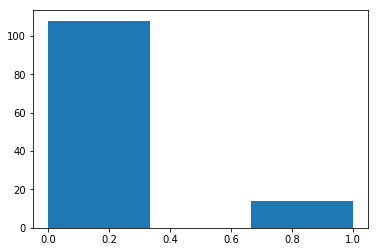

In [30]:
#we'll probably need to smooth out the data a little, 
data['info'] = data.apply(lambda x: False if x['AI2'] ==0 or x['Intelligence']==2 or x['AI4'] ==1 or x['Tests'] ==0
                          else True, axis=1)
i_counts=np.bincount(data['info']).astype(float)
print(i_counts)
#deleting intelligence brings it up a little
_ = plt.hist(data['info'], 3)

Ouch, from my initial feature engineering pretty much no one who took my survey knows anything about AI. While this is possible, I'm sure I could find 108 people out there that actually don't know anything about AI, it seems improbable. Essentially my most bluntly clever red herrings aren't a good assessment.

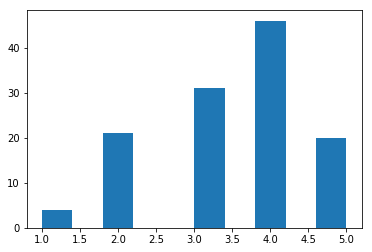

In [31]:
_ = plt.hist(data['AI'], 10)

Plus, while I don't trust people to accurately assess their own knowledge bases (particularly since most of my respondents were men), I don't think it would be this drastically different. Time to be more creative.

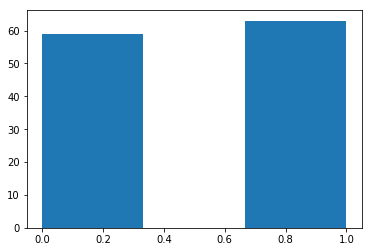

In [32]:
data['brain'] = data.apply(lambda x: False if x['AI2'] ==0 or x['Intelligence']==2
                          else True, axis=1)
_ = plt.hist(data['brain'], 3)

Splitting the sample by people who didn't choose the non-definition for intelligence and those who realize that they have contact with AI in their day-to-day lives splits the sample much more evenly. Below we can see that it correlates relatively highly to 'Sentiment', as 'Sentiment' correlates to 'AI2'.

In [33]:
data.corr()

,Age,Gender,Academic,Political,Education,Intelligence,Tests,AI1,AI3,AI,...,VA,Other,AI4,gen,yng,Pos,~Neg,sent_cats,info,brain
Age,1.000000,0.489081,0.238431,0.199449,0.190172,0.085680,0.114228,0.105843,-0.091744,0.245827,...,0.003145,0.199038,0.098975,0.840522,-0.789390,0.133440,0.096156,0.131885,-0.012833,-0.028105
Gender,0.489081,1.000000,0.204698,0.076826,0.077956,0.003705,0.295040,0.061456,0.090607,0.352029,...,-0.075330,-0.009073,0.213738,0.409387,-0.344810,0.256222,0.037895,0.179526,-0.085563,-0.071202
Academic,0.238431,0.204698,1.000000,0.125682,0.101527,0.034997,0.176036,0.117144,0.008301,0.057129,...,0.095623,-0.037258,0.135979,0.284412,-0.334806,0.144979,-0.009809,0.085883,-0.099829,0.032381
Political,0.199449,0.076826,0.125682,1.000000,-0.004645,0.122136,-0.057208,0.056663,-0.100473,-0.031113,...,0.042575,-0.074883,0.083761,0.224887,-0.246039,0.053350,-0.051110,0.007743,-0.178841,-0.104867
Education,0.190172,0.077956,0.101527,-0.004645,1.000000,0.045787,0.086323,-0.014395,0.074571,0.121066,...,-0.080379,0.216004,-0.017374,0.129910,-0.198250,-0.061373,0.010171,-0.033333,0.151447,0.076563
Intelligence,0.085680,0.003705,0.034997,0.122136,0.045787,1.000000,-0.082573,-0.060934,0.056228,-0.051431,...,-0.027191,0.133220,0.050317,-0.014813,-0.024778,-0.123762,-0.125388,-0.140507,-0.136701,-0.371067
Tests,0.114228,0.295040,0.176036,-0.057208,0.086323,-0.082573,1.000000,-0.105819,-0.059875,0.499662,...,0.093085,0.046722,0.127157,0.116789,-0.075883,0.181650,0.111346,0.169712,0.247784,0.220824
AI1,0.105843,0.061456,0.117144,0.056663,-0.014395,-0.060934,-0.105819,1.000000,0.049128,-0.048178,...,0.099987,-0.068910,-0.026971,0.052557,-0.126385,0.069251,-0.016315,0.035181,-0.106706,-0.084200
AI3,-0.091744,0.090607,0.008301,-0.100473,0.074571,0.056228,-0.059875,0.049128,1.000000,-0.038629,...,0.098225,-0.141367,-0.006724,-0.097584,0.031641,0.000245,0.067473,0.034047,-0.040043,-0.092670
AI,0.245827,0.352029,0.057129,-0.031113,0.121066,-0.051431,0.499662,-0.048178,-0.038629,1.000000,...,0.092538,0.207756,0.052008,0.175924,-0.138194,0.215254,0.082169,0.176104,0.181438,0.288028


Now let's make some sense of my academic feature.

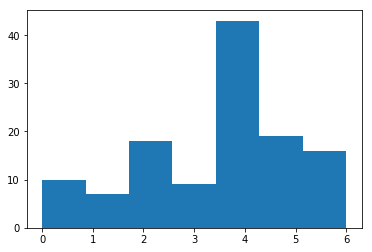

In [34]:
_ = plt.hist(data['Academic'], 7)

Text(0.5,1,'B.S., B.A., and Other Proportions\n')

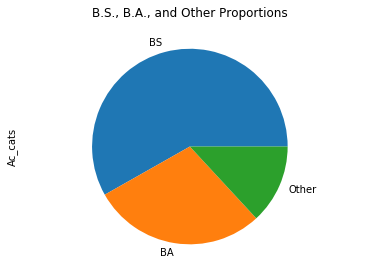

In [35]:
data['Ac_cats'] = data.apply(lambda x: 'BA' if x['Academic'] <=2 
                             else 'BS' if x['Academic']>2 and x['Academic'] <6
                             else 'Other', axis=1)

data.Ac_cats.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('B.S., B.A., and Other Proportions' + '\n')

Looks like the overwhealming majority of our individuals studied in a science field, which probably biases my sample. Online I can't find any information about the general population distribution of academic fields, but for example at AUP this is certainly not the case. 

Now of course I have to change it back to numeric to see my exact percentages and continue working with this feature.

In [36]:
data['Ac_cats'] = data.apply(lambda x: 1 if x['Academic'] <=2 
                             else 2 if x['Academic']>2 and x['Academic'] <6
                             else 0, axis=1)
#1 corresponds to a BA
#2 = BS 
#0 = other
ac_counts=np.bincount(data['Ac_cats']).astype(float)
print('BA percentage: ' + str((ac_counts[1]/len(data))*100) + '%' + '\n')
print('BS percentage: ' + str((ac_counts[2]/len(data))*100)+'%' + '\n')
print('Other percentage: ' + str((ac_counts[0]/len(data))*100)+'%')

BA percentage: 28.6885245902%

BS percentage: 58.1967213115%

Other percentage: 13.1147540984%


And here's the exact percentages of distribution.

Since we're on the topic of academia, let's look at how long people have been/were in school.

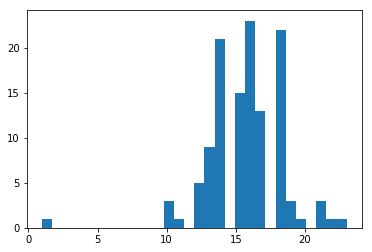

In [37]:
_ = plt.hist(data['Education'], 30)

So the vast majority of my sample has some sort of college experience. I wonder if I collected data in 20 years how this demographic would change. Anyway, let's group it together.

Text(0.5,1,"High School, Bachelor's, Master's, and Doctorate Proportions\n")

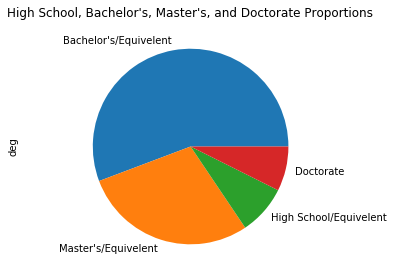

In [38]:

data['deg']=data.apply(lambda x: 'High School/Equivelent' if x['Education'] <=12
                       else "Bachelor's/Equivelent" if x['Education']>12 and x['Education']<=16
                       else "Master's/Equivelent" if x['Education']>16 and x['Education']<= 18
                             else "Doctorate", axis=1)


data.deg.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title("High School, Bachelor's, Master's, and Doctorate Proportions"+'\n')


Yes, so most of my sample has/is pursuing a bachelor's degrees. Now for the sake of using the data though I have to change it back to numerical values because 'strings'.

In [39]:
data['deg']=data.apply(lambda x: 0 if x['Education'] <=12
                       else 1 if x['Education']>12 and x['Education']<=16
                       else 2 if x['Education']>16 and x['Education']<= 18
                             else 3, axis=1)


I'm going to take a look at people's political standing as well quickly, just to get a demographic idea.

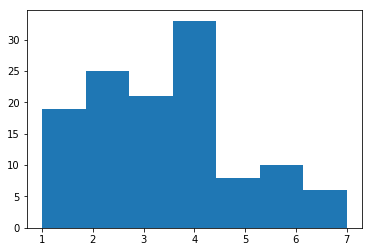

In [40]:
_ = plt.hist(data['Political'], 7)

Once again, I'm an idiot for providing a neutral response option.

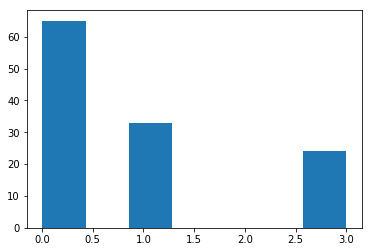

In [41]:
data['lib']=data.apply(lambda x: 0 if x['Political'] <4
                       else 1 if x['Political']==4
                             else 3, axis=1)
_ = plt.hist(data['lib'], 7)

Interesting, so while the majority of responses are on the "liberal" end of the spectrum, very very few are on the "conservative" end. It is important to note that in the survey I did not define my spectrum endpoints. Most of the [scales](http://slideplayer.com/slide/726731/2/images/1/The+Political+Spectrum.jpg) I found identified the endpoints as "Socialist/Communist" on the left and "Fascist" on the right. As these are pretty emotionally loaded terms in contemerary American lexicon, I chose not to specify. It was pointed out by one participant though that politial spectrums differ based on nationality, so potentially this data is not very consistent.

Because this method of dividing up my data by positive, negative, and neutral isn't very accurate for visualization (as previously stated, positive and negative contain three posible rankings, while neutral only contains one), I'm going to turn this feature into a boolean.

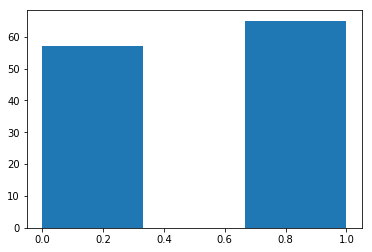

In [42]:
data['lib']=data.apply(lambda x: True if x['Political'] <4
                       else False, axis=1)
_ = plt.hist(data['lib'], 3)

We can see that I have more "liberal" individuals than "conservative" and neutral combined.

Moving on. Because my clever survey questions haven't panned out as well as I had hoped, let's look at who chose the McCarthy answers for my two questions that had them as options. I didn't really expect people to recongize the quotes as McCarthy and pick them because of it, but let's see what we have.

[ 106.   16.]


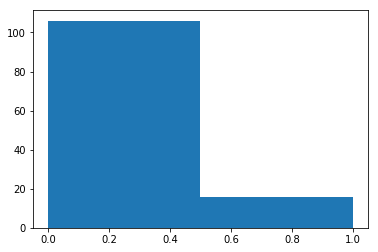

In [43]:
data['McCarthy'] = data.apply(lambda x: True if x['AI1'] ==0 and x['Intelligence']==1
                             else False, axis=1)
p=plt.hist(data['McCarthy'], 2)

Mc_counts=np.bincount(data['McCarthy']).astype(float)

print(Mc_counts)

Okay, so 16 people chose both McCarthy quotes. I wonder if that changes anything interesting in our correlations.

In [44]:
data.corr()

,Age,Gender,Academic,Political,Education,Intelligence,Tests,AI1,AI3,AI,...,yng,Pos,~Neg,sent_cats,info,brain,Ac_cats,deg,lib,McCarthy
Age,1.000000,0.489081,0.238431,0.199449,0.190172,0.085680,0.114228,0.105843,-0.091744,0.245827,...,-0.789390,0.133440,0.096156,0.131885,-0.012833,-0.028105,0.230657,0.251856,-0.177191,-0.164948
Gender,0.489081,1.000000,0.204698,0.076826,0.077956,0.003705,0.295040,0.061456,0.090607,0.352029,...,-0.344810,0.256222,0.037895,0.179526,-0.085563,-0.071202,0.371367,0.112424,0.016138,-0.280065
Academic,0.238431,0.204698,1.000000,0.125682,0.101527,0.034997,0.176036,0.117144,0.008301,0.057129,...,-0.334806,0.144979,-0.009809,0.085883,-0.099829,0.032381,0.018621,0.132002,-0.168734,-0.067459
Political,0.199449,0.076826,0.125682,1.000000,-0.004645,0.122136,-0.057208,0.056663,-0.100473,-0.031113,...,-0.246039,0.053350,-0.051110,0.007743,-0.178841,-0.104867,-0.199963,-0.027436,-0.831086,-0.120138
Education,0.190172,0.077956,0.101527,-0.004645,1.000000,0.045787,0.086323,-0.014395,0.074571,0.121066,...,-0.198250,-0.061373,0.010171,-0.033333,0.151447,0.076563,0.045642,0.870004,0.020753,0.015775
Intelligence,0.085680,0.003705,0.034997,0.122136,0.045787,1.000000,-0.082573,-0.060934,0.056228,-0.051431,...,-0.024778,-0.123762,-0.125388,-0.140507,-0.136701,-0.371067,0.004881,-0.000237,0.023753,0.140431
Tests,0.114228,0.295040,0.176036,-0.057208,0.086323,-0.082573,1.000000,-0.105819,-0.059875,0.499662,...,-0.075883,0.181650,0.111346,0.169712,0.247784,0.220824,0.222687,0.095533,-0.020964,-0.014370
AI1,0.105843,0.061456,0.117144,0.056663,-0.014395,-0.060934,-0.105819,1.000000,0.049128,-0.048178,...,-0.126385,0.069251,-0.016315,0.035181,-0.106706,-0.084200,-0.025919,0.016364,-0.091312,-0.539843
AI3,-0.091744,0.090607,0.008301,-0.100473,0.074571,0.056228,-0.059875,0.049128,1.000000,-0.038629,...,0.031641,0.000245,0.067473,0.034047,-0.040043,-0.092670,0.038811,0.126626,0.151208,-0.050531
AI,0.245827,0.352029,0.057129,-0.031113,0.121066,-0.051431,0.499662,-0.048178,-0.038629,1.000000,...,-0.138194,0.215254,0.082169,0.176104,0.181438,0.288028,0.155298,0.104580,-0.005732,-0.010919


Not that I can see, too bad. This is a rough dataset. Plus now I have a huge number of features, so this is all a pain to read.

One of my initial ideas was that the numerber of films containing AI someone had watched would negatively correlate with how they felt about AI. While this was not the case, let's take a look at how many films people have watched.

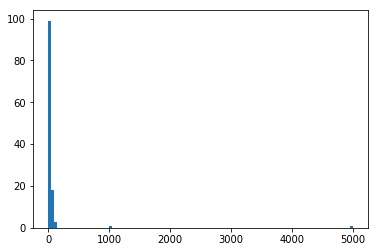

In [45]:
p=plt.hist(data['Films'], 100)

Okay as we saw when we first visualized this feature, obviously it is a terrible feature to look at as is due to individual index 84, the fake instance mentioned in the [Introduction](#Introduction). I didn't do anything with it then, but now if I want to look at my spread I'm going to have to.

In [46]:
data[data['Films']>200]

,Age,Gender,Academic,Political,Education,Intelligence,Tests,AI1,AI3,AI,...,yng,Pos,~Neg,sent_cats,info,brain,Ac_cats,deg,lib,McCarthy
7,21,0,3.0,3,14,1,0,2,7,4,...,True,False,False,0,False,False,2,1,True,False
84,100,2,5.0,4,1,0,3,1,2,5,...,False,True,True,2,False,False,2,0,False,False


Apparently there are two wildcards. Peachy.

Let's replace it with the median, since these two massive numbers will mess up the mean.

19.0


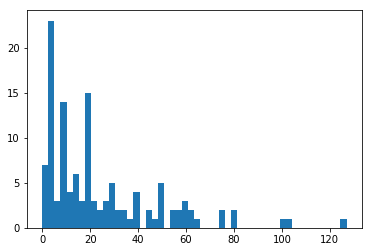

In [47]:
med=data['Films'].median()
data['Films']= data.apply(lambda x: x['Films'] if x['Films']<=200
                         else med, axis=1)
_=plt.hist(data['Films'],50)
print(med)

Looks like the majority of film numbers are between 0-20ish, but I don't think it's a good idea to mess with this feature much more. Because of my hunch that it negatively effects sentiment, I'm going to leave it continuous. Besides, what do I call that feature, 'couch_potato'?

Just kidding, of course I'm going to mess with it.

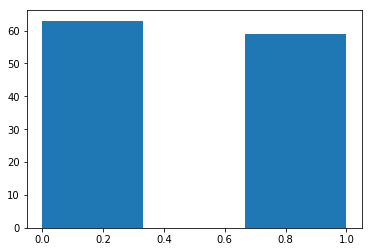

In [48]:
data['couch_potato']= data.apply(lambda x: True if x['Films']>=20
                         else False, axis=1)
_=plt.hist(data['couch_potato'],3)

In [49]:
data.corr()

,Age,Gender,Academic,Political,Education,Intelligence,Tests,AI1,AI3,AI,...,Pos,~Neg,sent_cats,info,brain,Ac_cats,deg,lib,McCarthy,couch_potato
Age,1.000000,0.489081,0.238431,0.199449,0.190172,0.085680,0.114228,0.105843,-0.091744,0.245827,...,0.133440,0.096156,0.131885,-0.012833,-0.028105,0.230657,0.251856,-0.177191,-0.164948,0.028105
Gender,0.489081,1.000000,0.204698,0.076826,0.077956,0.003705,0.295040,0.061456,0.090607,0.352029,...,0.256222,0.037895,0.179526,-0.085563,-0.071202,0.371367,0.112424,0.016138,-0.280065,0.229719
Academic,0.238431,0.204698,1.000000,0.125682,0.101527,0.034997,0.176036,0.117144,0.008301,0.057129,...,0.144979,-0.009809,0.085883,-0.099829,0.032381,0.018621,0.132002,-0.168734,-0.067459,0.034254
Political,0.199449,0.076826,0.125682,1.000000,-0.004645,0.122136,-0.057208,0.056663,-0.100473,-0.031113,...,0.053350,-0.051110,0.007743,-0.178841,-0.104867,-0.199963,-0.027436,-0.831086,-0.120138,-0.141168
Education,0.190172,0.077956,0.101527,-0.004645,1.000000,0.045787,0.086323,-0.014395,0.074571,0.121066,...,-0.061373,0.010171,-0.033333,0.151447,0.076563,0.045642,0.870004,0.020753,0.015775,0.182232
Intelligence,0.085680,0.003705,0.034997,0.122136,0.045787,1.000000,-0.082573,-0.060934,0.056228,-0.051431,...,-0.123762,-0.125388,-0.140507,-0.136701,-0.371067,0.004881,-0.000237,0.023753,0.140431,-0.203320
Tests,0.114228,0.295040,0.176036,-0.057208,0.086323,-0.082573,1.000000,-0.105819,-0.059875,0.499662,...,0.181650,0.111346,0.169712,0.247784,0.220824,0.222687,0.095533,-0.020964,-0.014370,0.241754
AI1,0.105843,0.061456,0.117144,0.056663,-0.014395,-0.060934,-0.105819,1.000000,0.049128,-0.048178,...,0.069251,-0.016315,0.035181,-0.106706,-0.084200,-0.025919,0.016364,-0.091312,-0.539843,-0.166818
AI3,-0.091744,0.090607,0.008301,-0.100473,0.074571,0.056228,-0.059875,0.049128,1.000000,-0.038629,...,0.000245,0.067473,0.034047,-0.040043,-0.092670,0.038811,0.126626,0.151208,-0.050531,-0.065591
AI,0.245827,0.352029,0.057129,-0.031113,0.121066,-0.051431,0.499662,-0.048178,-0.038629,1.000000,...,0.215254,0.082169,0.176104,0.181438,0.288028,0.155298,0.104580,-0.005732,-0.010919,0.379078


So this new feature does have a strong correlation with AI, potentially indicating that the more AI containing movies a person watches the more informed about AI they generally rate themselves. That's for another project though.


## Ananlysis

### Supervised Methods

**Note:** Due to the microscopic size of my dataset, my models change depending on how many times I run the cells, so my observations are mostly general based on what I have seen after running the cells many many many times. If my interpretations seem outrageously incorrect, it's probably because the model has changed.

#### Simple Analysis - Linear Regression

Initially, I'm going to see if linear regression can confirm some of my suspicions. Note that I'm really just playing around here with my features and linear regresssion, not doing my serious analysis.

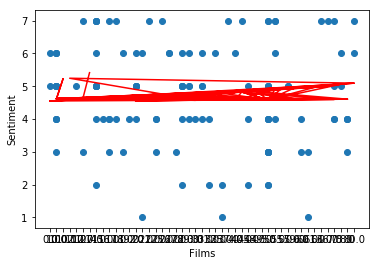

In [50]:
from sklearn import linear_model
X = data[['Films']]
Y = data['Sentiment']

lm = linear_model.LinearRegression()
lm.fit(X, Y)

fig, ax = plt.subplots(1, 1) 
ax.scatter(X,Y)

ax.plot(X,lm.predict(data.Films[:, np.newaxis]), 
                   color = 'red')
ax.set_xlabel('Films')
ax.set_ylabel('Sentiment')
plt.show()

Apparently not.

Let's see if any of my other hunches pan out.

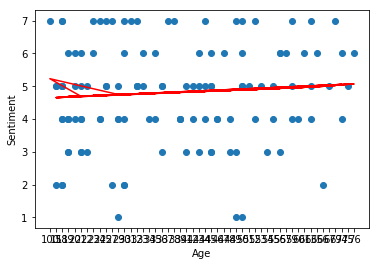

In [51]:
X = data[['Age']]
Y = data['Sentiment']

fig, ax = plt.subplots(1, 1) 
ax.scatter(X,Y)

ax.plot(X,lm.predict(data.Age[:, np.newaxis]), 
                   color = 'red')
ax.set_xlabel('Age')
ax.set_ylabel('Sentiment')
plt.show()

Interesting, the ever so slightest positive trend, but not great.

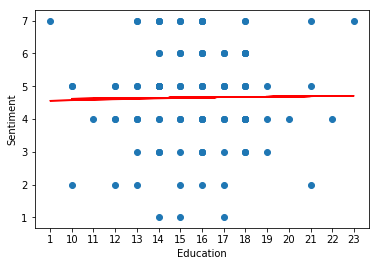

In [52]:
X = data[['Education']]
Y = data['Sentiment']

fig, ax = plt.subplots(1, 1) 
ax.scatter(X,Y)

ax.plot(X,lm.predict(data.Education[:, np.newaxis]), 
                   color = 'red')
ax.set_xlabel('Education')
ax.set_ylabel('Sentiment')
plt.show()

Again, ever so slight positive slope, but the data is pretty scattered. Because my target feature isn't continuous, basic linear regression doesn't work very well. Maybe playing with my target feature will help.

In [53]:
import statsmodels.api as sm
from statsmodels.api import add_constant
X = data.loc[:, data.columns != 'Sentiment'].astype(float)
Y = data['Sentiment']

result = sm.OLS( Y, add_constant(X) ).fit()

result.summary()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Sentiment   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     18.63
Date:                Thu, 28 Dec 2017   Prob (F-statistic):           7.67e-27
Time:                        08:41:36   Log-Likelihood:                -113.60
No. Observations:                 122   AIC:                             281.2
Df Residuals:                      95   BIC:                             356.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.0870      0.993      2.102      0.038       0.116       4.058
Age             -0.0073      0.008     -0.877      0.383      -0.024       0.009
Gender           0.2478      0.183      1.355      0.179      -0.115       0.611
Academic         0.0588      0.043      1.372      0.173      -0.026       0.144
Political       -0.0099      0.077     -0.128      0.898      -0.164       0.144
Education        0.0098      0.058      0.171      0.864      -0.104       0.124
Intelligence     0.0717      0.124      0.576      0.566      -0.175       0.319
Tests            0.2156      0.095      2.272      0.025       0.027       0.404
AI1             -0.0308      0.096     -0.321      0.749      -0.221       0.160
AI3             -0.0187      0.021     -0.889      0.376      -0.061       0.023
AI               0.0450      0.080      0.562      0.576      -0.114       0.204
Films            0.0001      0.004      0.029      0.977      -0.008       0.008
AI2             -0.3520      0.286     -1.233      0.221      -0.919       0.215
VA               0.0707      0.147      0.479      0.633      -0.222       0.363
Other            0.1523      0.151      1.010      0.315      -0.147       0.452
AI4             -0.3172      0.209     -1.520      0.132      -0.732       0.097
gen              0.1454      0.173      0.840      0.403      -0.198       0.489
yng              0.0519      0.293      0.177      0.860      -0.530       0.634
Pos              0.6507      0.175      3.724      0.000       0.304       0.998
~Neg             0.4462      0.183      2.440      0.017       0.083       0.809
sent_cats        1.0969      0.063     17.481      0.000       0.972       1.221
info            -0.3805      0.312     -1.221      0.225      -0.999       0.238
brain            0.4312      0.306      1.411      0.162      -0.176       1.038
Ac_cats         -0.1000      0.107     -0.937      0.351      -0.312       0.112
deg             -0.0451      0.210     -0.215      0.830      -0.462       0.372
lib              0.0373      0.262      0.142      0.887      -0.482       0.557
McCarthy         0.0906      0.263      0.345      0.731      -0.431       0.612
couch_potato    -0.0515      0.204     -0.252      0.801      -0.457       0.354
==============================================================================
Omnibus:                        0.239   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.888   Jarque-Bera (JB):                0.413
Skew:                          -0.023   Prob(JB):                        0.813
Kurtosis:                       2.719   Cond. No.                     1.08e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specif

I'm not a statistician, so interpreting these results is shakey at best for me. Overall though it looks like the specific features I made to test AI general knowledge have lower p>|t| values than the more standard features, such as age, political standing, gender, and education don't have much statistical signifigance in this dataset. The only thing I can interpret this to mean is that I'm not entirely horrible at making surveys and it's a good thing I collected some creative features.


### More Complex Modeling

Simple analysis didn't really tell me anything interesting or easily interpreted, so let's see what else I can do with classification trees, logistic regression, and support vector machines.

Rather than trying to predict the magnitude of sentiment as in my simple analysis, I think it's more useful to predict whether people will feel destinctly positively or not about AI. Since my artifical feature (see what I did there?) 'Pos' was split about 50/50, I'm going to use that as my target, since it's boolean it makes my modeling slightly easier.

Plus using distinctly positive sentiment will come into play in the [Business Implementation Scenario](#Business-Implementation-Scenario) at the end of this project, so it's probably best to stay consistent.

In [54]:
#very much prefer this way of deleting features, delightful
data=data.drop(['sent_cats','~Neg', 'Sentiment', 'Academic','Other', 'AI1', 'Intelligence','AI2','info', 'gen','Education'], axis=1)

y = data['Pos']
X = data.drop('Pos', axis=1)
data.corr()

,Age,Gender,Political,Tests,AI3,AI,Films,VA,AI4,yng,Pos,brain,Ac_cats,deg,lib,McCarthy,couch_potato
Age,1.000000,0.489081,0.199449,0.114228,-0.091744,0.245827,0.091333,0.003145,0.098975,-0.789390,0.133440,-0.028105,0.230657,0.251856,-0.177191,-0.164948,0.028105
Gender,0.489081,1.000000,0.076826,0.295040,0.090607,0.352029,0.245433,-0.075330,0.213738,-0.344810,0.256222,-0.071202,0.371367,0.112424,0.016138,-0.280065,0.229719
Political,0.199449,0.076826,1.000000,-0.057208,-0.100473,-0.031113,-0.147436,0.042575,0.083761,-0.246039,0.053350,-0.104867,-0.199963,-0.027436,-0.831086,-0.120138,-0.141168
Tests,0.114228,0.295040,-0.057208,1.000000,-0.059875,0.499662,0.154979,0.093085,0.127157,-0.075883,0.181650,0.220824,0.222687,0.095533,-0.020964,-0.014370,0.241754
AI3,-0.091744,0.090607,-0.100473,-0.059875,1.000000,-0.038629,-0.047026,0.098225,-0.006724,0.031641,0.000245,-0.092670,0.038811,0.126626,0.151208,-0.050531,-0.065591
AI,0.245827,0.352029,-0.031113,0.499662,-0.038629,1.000000,0.347291,0.092538,0.052008,-0.138194,0.215254,0.288028,0.155298,0.104580,-0.005732,-0.010919,0.379078
Films,0.091333,0.245433,-0.147436,0.154979,-0.047026,0.347291,1.000000,0.102742,-0.007118,-0.114945,0.094818,0.257021,0.000578,0.029956,0.136152,0.029348,0.722658
VA,0.003145,-0.075330,0.042575,0.093085,0.098225,0.092538,0.102742,1.000000,0.027496,-0.048439,0.200631,0.295818,-0.092974,-0.025610,-0.097509,0.054941,0.032271
AI4,0.098975,0.213738,0.083761,0.127157,-0.006724,0.052008,-0.007118,0.027496,1.000000,-0.119891,0.154068,-0.055015,-0.067165,0.007069,-0.110208,-0.154745,0.092303
yng,-0.789390,-0.344810,-0.246039,-0.075883,0.031641,-0.138194,-0.114945,-0.048439,-0.119891,1.000000,-0.006514,-0.034460,-0.203483,-0.191187,0.259943,0.175362,-0.031229


It's interesting (and I'll admit a little disapointing) that nothing has a large correlation with 'Pos', but we'll see what the models come up with.

The two features with the strongest correlation are 'brain' (.2769) and 'Ac_cats'(.1828). I don't see these as being particularly noteworthy, but my psychology colleagues who have taken statistics assure me it's not bad. Either way, it appears that knowing AI is already integrated into your life, knowing what a definition is, and having a more intense academic field (although I am totally biased in thinking that a B.S. is harder than a B.A.) has a positive correlation with 'Sentiment'.

In [55]:
#the orthodox way to make holdout data
from sklearn.model_selection import train_test_split
#setting aside 15% for testing because I have such a tiny dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
print(len(X_train))
print(len(X_test))

103
19


Because my dataset is microscopic, I'm also making my test set microscopic.

#### Choosing A Model and Training

Now we have to identify which of the models we've learned this semester yield the best results when we're trying to predict sentiment. Within these models, we'll also have to identify the parameters we can adjust to produce the most accurate model.
##### Classification Trees

For classification trees, first I'm going to check some parameters to see how they effect the accuracy of the model.

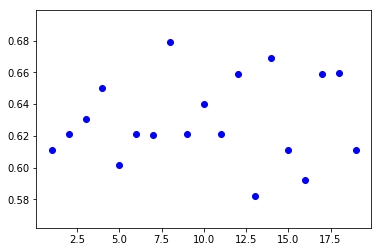

In [56]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

import numpy as np
from sklearn.metrics import accuracy_score

rng = np.arange(1,20,1)
acc = []
for s in rng:
    model = DecisionTreeClassifier(max_depth=s)
    acc.append(cross_val_score(model, X_train, y_train).mean())

_ = plt.scatter(rng, acc, c='blue')

Of course this graph changes every time the data is split differently, but in general 1 is the value withe highest accuracy, which is disappointing.

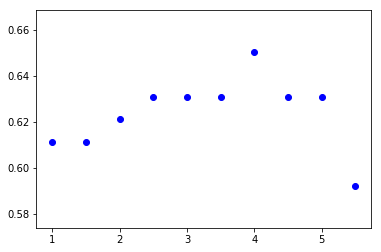

In [57]:
rng = np.arange(1,6,.5)
acc = []
for s in rng:
    model = DecisionTreeClassifier(max_depth=s)
    acc.append(cross_val_score(model, X_train, y_train).mean())

_ = plt.scatter(rng, acc, c='blue')

Interesting, so we can see that as our model becomes more complex, in general accuracy suffers. It does oscilate a bit depending on how many times you run the train_test_split cell, but looks like max_depth=1 is best most frequently, and still that's not even great.

Since our most consistent "best" accuracy is essentially for a baseline model, classification trees will probably not be the model we want to use.

In [58]:
model = DecisionTreeClassifier(max_depth=1)
model.fit(X_train,y_train)
accuracy_score(y_test,model.predict(X_test))

0.52631578947368418

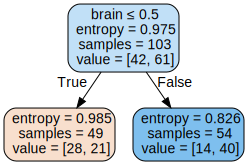

In [59]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=1)
clf = clf.fit(X_train, y_train)
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X_train.columns.values,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

My feature name is a little misleading, but essentially if someone doesn't know they have contact with AI or chose the red herring non-definition for intelligence they probably have a positive sentiment. In both nodes though there's a lot of entropy, so this model probably isn't the best we can do. Plus unfortunately it's just a baseline model.

##### Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(penalty='l1')
model1.fit(X_train,y_train)
accuracy_score(y_test,model1.predict(X_test))

0.57894736842105265

In [61]:
model2 = LogisticRegression()
model2.fit(X_train,y_train)
accuracy_score(y_test,model2.predict(X_test))

0.52631578947368418

#### Support Vector Classification

In [62]:
from sklearn.svm import LinearSVC
model3 = LinearSVC()
model3.fit(X_train,y_train)
accuracy_score(y_test,model3.predict(X_test))

0.52631578947368418

So ultimately, it's really difficult for me to analyze and compare my models using accuracy, because they keep changing every time I run the model cells or the train_test_split. It looks like either Logistic Regression model generally works the best, however I honestly can't know for sure. Usually Support Vector Classification preforms pretty poorly, but of course it changes to based on atmospheric pressure, or aliens, I don't know.

##### Learning Curves For Chosen Model

Because I can't be sure which model will be the best when the next person who sees this runs my code, I'm including learning curves for all my models. Also note that these change every time the data is split for training and testing, so what I write as analysis will not always be true.

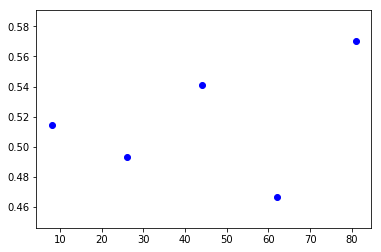

In [63]:
from sklearn.model_selection import learning_curve
model=DecisionTreeClassifier(max_depth=1)
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)
plt.scatter(train_sizes, np.mean(test_scores, axis=1), c='blue')

Looks like for our baseline decision tree model more data is better, which given the minuscule nature of my dataset isn't surprising.

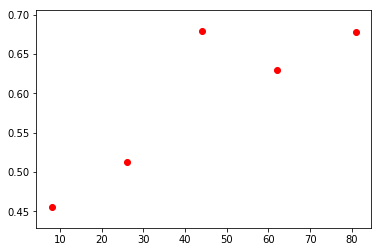

In [64]:
model=LogisticRegression(penalty='l1')
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)
plt.scatter(train_sizes, np.mean(test_scores, axis=1), c='red')

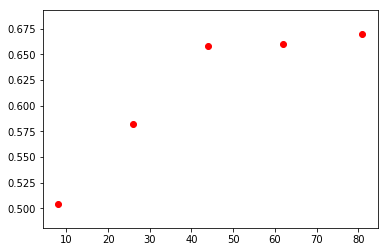

In [65]:
model=LogisticRegression()
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)
plt.scatter(train_sizes, np.mean(test_scores, axis=1), c='red')

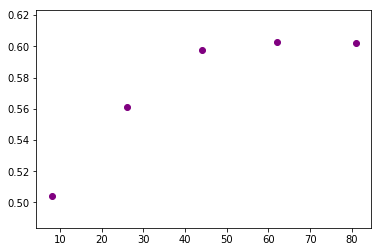

In [66]:
model=LinearSVC()
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)
plt.scatter(train_sizes, np.mean(test_scores, axis=1), c='purple')

In general if I'm interpreting the plots correctly, it looks like more data is better depending on how many times you run the cells. 

### Unsupervised Methods

#### Dendrogram

Because I already did a lot of "clustering" to my data before I used supervised methods to analyze it, I'm going to reload and reclean it just to see what natural divisions exist in the original, unaltered dataset.

I'm also not going to worry about train_test_split or overfitting because I just want to understand and look for trends in the data I have.

In [67]:
data = pd.read_csv('./Data Science Final Project Data Collection (Responses) - Form Responses 1-5.csv')
data=data.replace('Yes', True)
data=data.replace('No', False)
data= data.replace('Arts (Visual, Performing, etc)',0)
data= data.replace('Humanities (History, Geography, Philosophy, Languages and Literature, etc)',1)
data= data.replace('Social Sciences (Anthropology, Psychology, Economics, Law, Political Science, etc)',2)
data= data.replace('Natural Sciences (Biology, Chemistry, Physics, etc)',3)
data= data.replace('Formal Sciences (Computer Science, Mathematics, Statistics, etc)',4)
data= data.replace('Applied Sciences (Engineering, Health Sciences, etc)',5)
data= data.replace('Other (Business, Marketing, Education, etc)',6)
data= data.replace('N/A',7)
data= data.replace('None',0)
data= data.replace('Turing Test' or 'Winograd Schema Challenge' or 'Choice of Plausible Alternatives (COPA)',1)
data=data.replace('Choice of Plausible Alternatives (COPA)',1)
data=data.replace('Turing Test, Winograd Schema Challenge',2)
data=data.replace('Turing Test, Choice of Plausible Alternatives (COPA)' or 'Winograd Schema Challenge, Choice of Plausible Alternatives (COPA)',2)
data= data.replace('Turing Test, Winograd Schema Challenge, Choice of Plausible Alternatives (COPA)',3)
del data['Timestamp']
data['Gender'] = data['Gender'].astype('category').cat.codes


data['Intelligence'] = data['Intelligence'].astype('category').cat.codes
data['AI1'] = data['AI1'].astype('category').cat.codes
data['AI3'] = data['AI3'].astype('category').cat.codes
data['AI4'] = data['AI4'].astype('category').cat.codes
data=data.fillna(0)
data['Other']=data.apply(lambda x: False if x['Other']==0
                        else True, axis = 1)
med=data['Films'].median()
data['Films']= data.apply(lambda x: x['Films'] if x['Films']<=200
                         else med, axis=1)

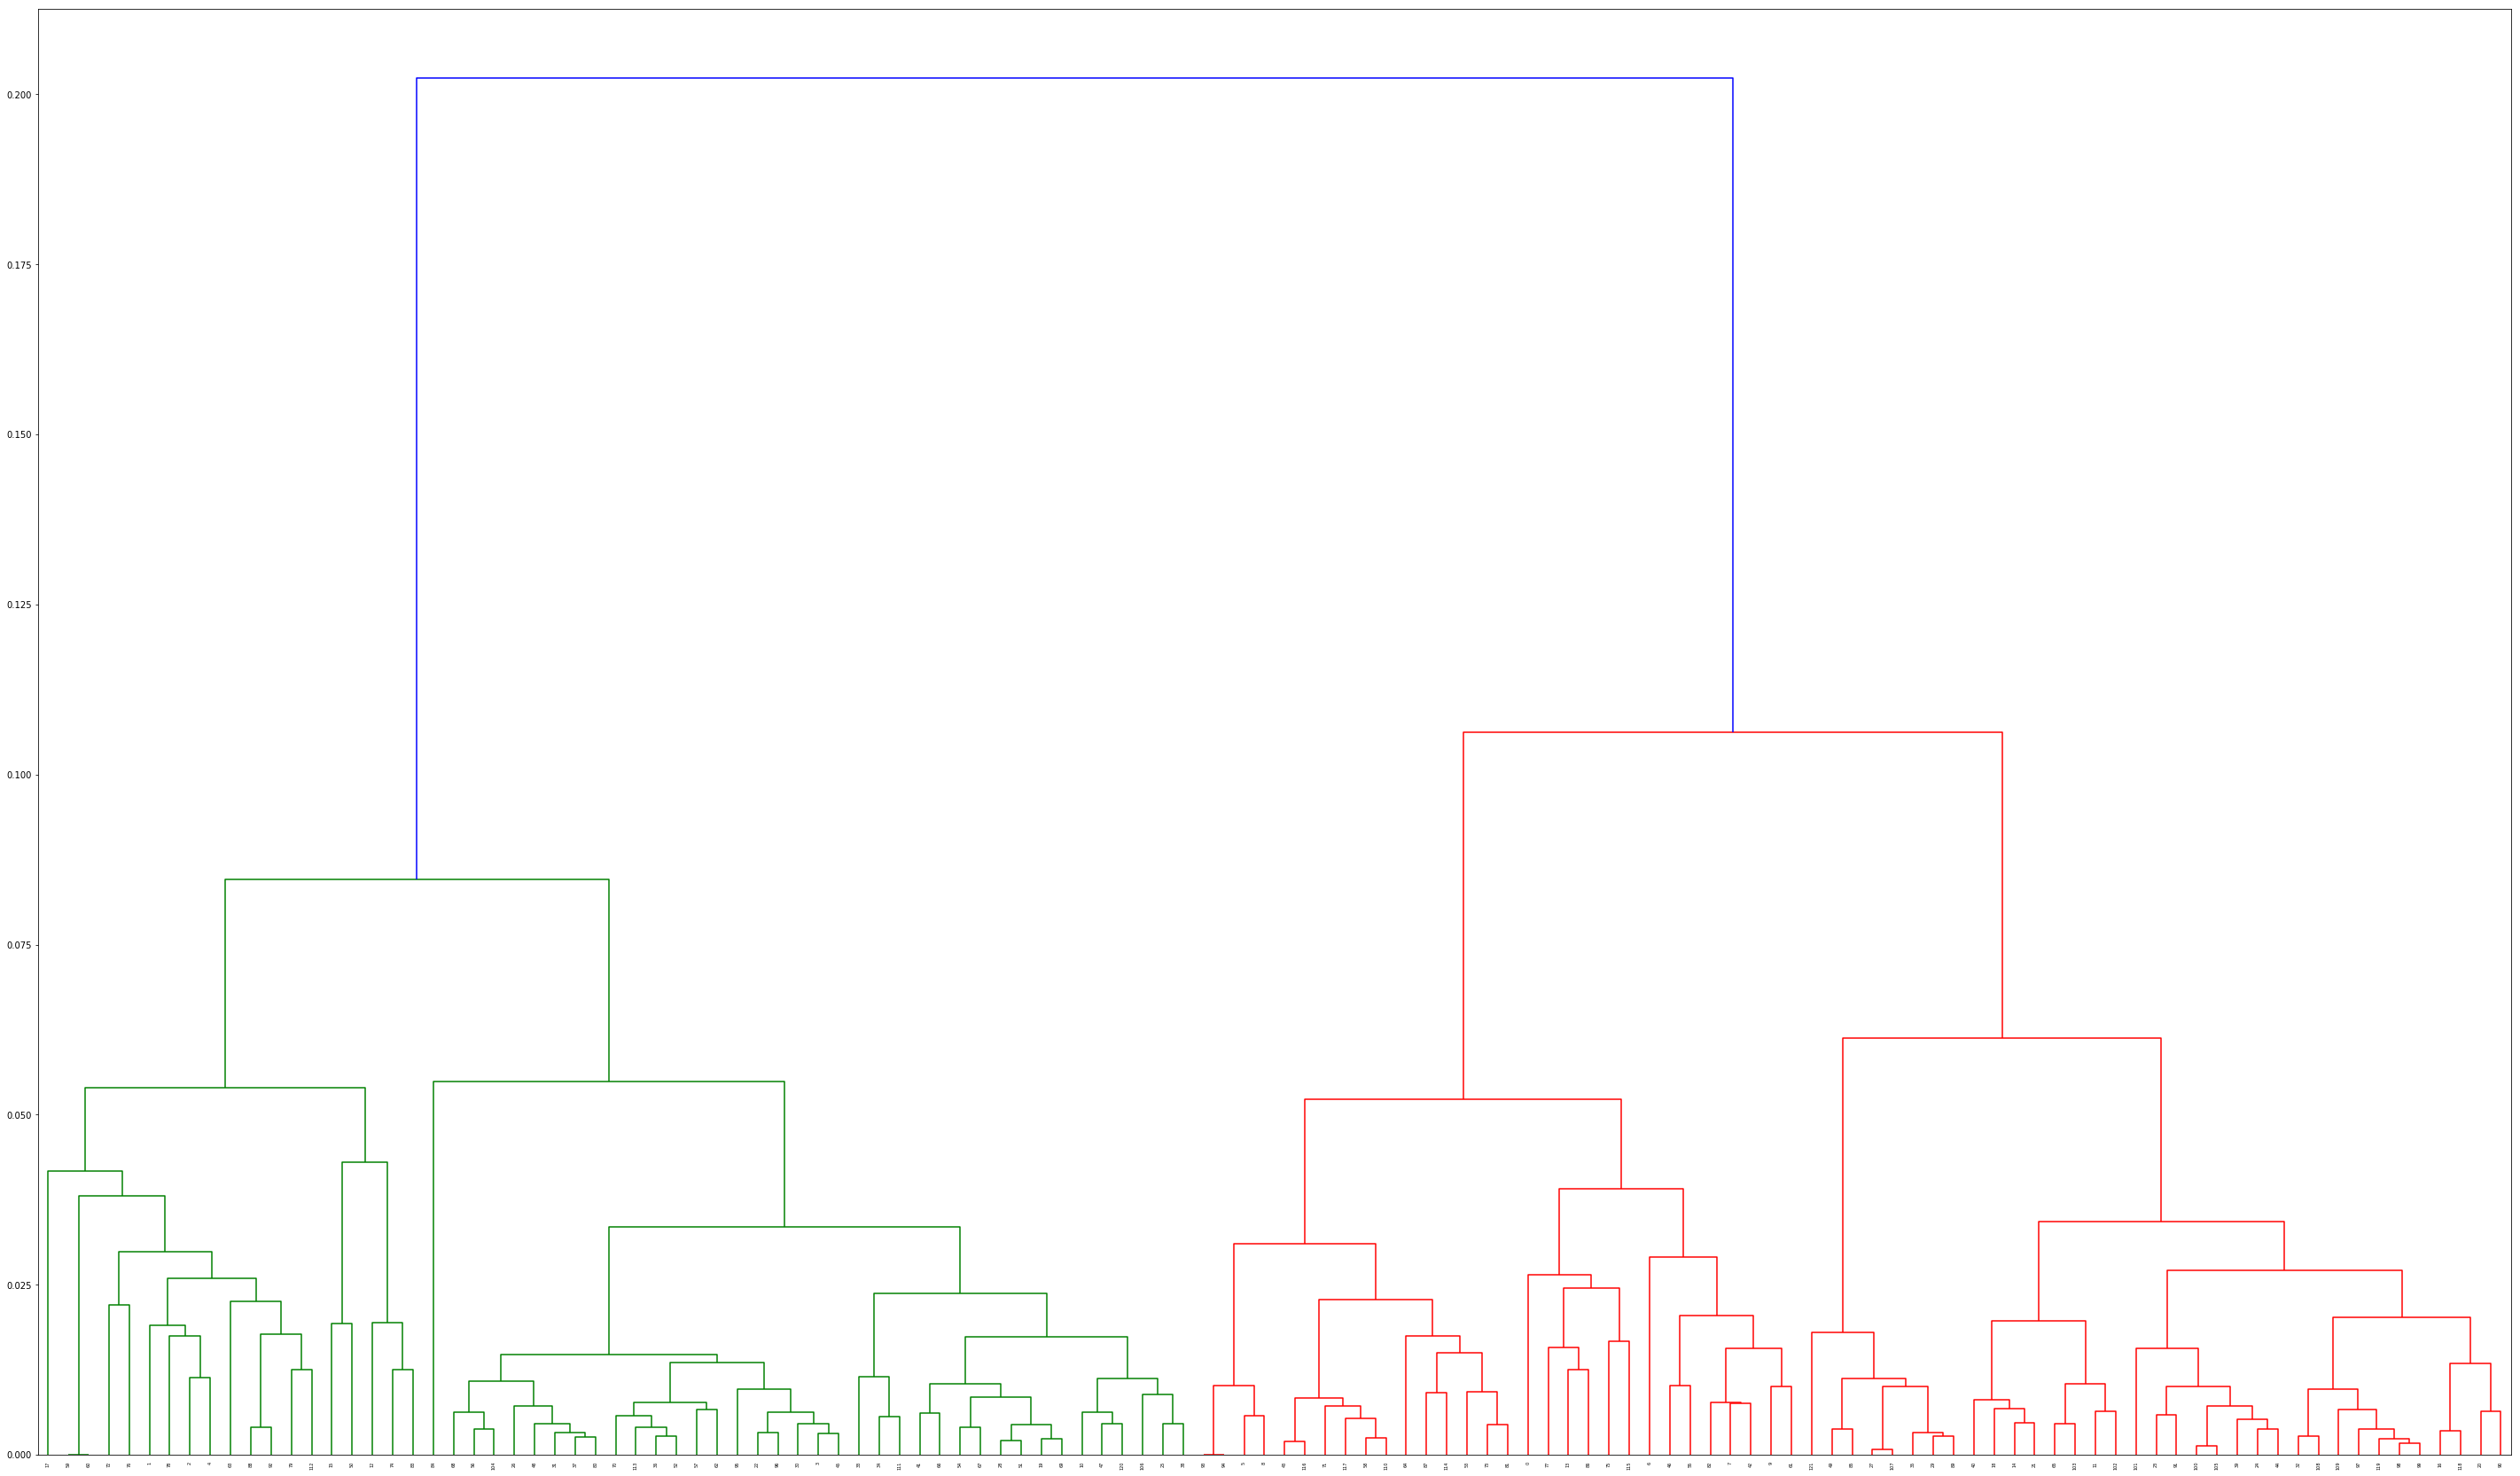

In [68]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
dists= pdist(data, metric='cosine') 
metric='euclidian'
links = linkage(dists, method='average')
plt.figure(figsize=(50,30))
den=dendrogram(links)

#### Agglomerative Clustering

Because my dendrogram has 2 distinct classes, I'm going to use that for my other methods.

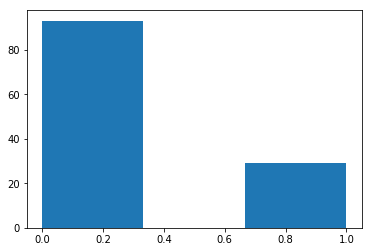

In [69]:
from sklearn.cluster import AgglomerativeClustering

clusters = AgglomerativeClustering(n_clusters=2)
arr = clusters.fit_predict(X)

data['cluster'] = arr

data.sort_values('cluster')
_ = plt.hist(data['cluster'], 3)

In [74]:
data.groupby('cluster').mean()

,Age,Gender,Academic,Political,Education,Intelligence,Tests,AI1,AI3,AI,Films,Sentiment,AI2,VA,Other,AI4
cluster,,,,,,,,,,,,,,,,
0,43.354839,0.838710,4.129032,2.967742,16.483871,0.483871,1.161290,1.129032,3.548387,4.000000,59.709677,4.967742,0.741935,0.548387,0.516129,0.774194
1,37.175824,0.549451,3.351648,3.450549,15.351648,0.802198,0.989011,1.197802,3.978022,3.285714,13.000000,4.637363,0.604396,0.472527,0.340659,0.725275


In [75]:
data.groupby('cluster').describe()


AI                                                AI1            \
        count      mean       std  min  25%  50%  75%  max count      mean   
cluster                                                                      
0        31.0  4.000000  0.930949  2.0  3.0  4.0  5.0  5.0  31.0  1.129032   
1        91.0  3.285714  1.046536  1.0  2.5  3.0  4.0  5.0  91.0  1.197802   

        ...  Sentiment      Tests                                               
        ...        75%  max count      mean       std  min  25%  50%  75%  max  
cluster ...                                                                     
0       ...        6.0  7.0  31.0  1.161290  0.637536  0.0  1.0  1.0  1.0  3.0  
1       ...        5.5  7.0  91.0  0.989011  0.960260  0.0  0.0  1.0  1.0  3.0  

[2 rows x 104 columns]

#### KMeans Classifier

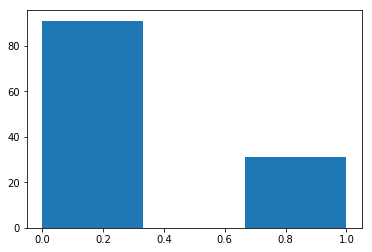

In [76]:
from sklearn.cluster import KMeans
model = KMeans(2)
model.fit(data)
clusters=model.predict(data)
data['cluster']=clusters
_ = plt.hist(data['cluster'], 3)

In [77]:
data.groupby('cluster').describe()

AI                                                AI1            \
        count      mean       std  min  25%  50%  75%  max count      mean   
cluster                                                                      
0        91.0  3.285714  1.046536  1.0  2.5  3.0  4.0  5.0  91.0  1.197802   
1        31.0  4.000000  0.930949  2.0  3.0  4.0  5.0  5.0  31.0  1.129032   

        ...  Sentiment      Tests                                               
        ...        75%  max count      mean       std  min  25%  50%  75%  max  
cluster ...                                                                     
0       ...        5.5  7.0  91.0  0.989011  0.960260  0.0  0.0  1.0  1.0  3.0  
1       ...        6.0  7.0  31.0  1.161290  0.637536  0.0  1.0  1.0  1.0  3.0  

[2 rows x 104 columns]

Again we can see that though KMeans and Agglomerative Clustering sort individuals into "different" clusters, it's only the indexes that change, not the individuals in clusters. Basically cluster content is the same, but their names are different.

91


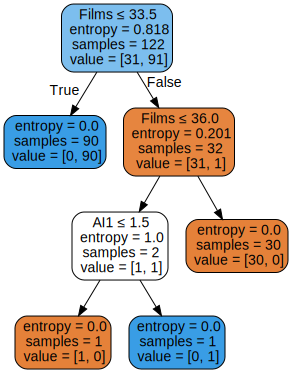

In [78]:
data['cluster'] = data.apply(lambda x: True if x['cluster'] ==0
                             else False, axis = 1)
y = data['cluster']

X = data.drop('cluster', axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X, y)
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns.values,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data) 
print(len(data[data['cluster']==True]))
graph

Classification trees probably aren't the easiest way to understand the way the algorithm is clustering my data, but with a dataset this size it's the best way I know. I chose to have 2 clusters, since that's very simplistically what my dendrogram did, though the two other methods had rather differently sized clusters.

It was very difficult to use classification trees on this data in particular, because the cluster indexes and sizes changed every time I ran the cells. For the most part though, it looks like my data was split up by age and how many films people had watched. For a while I had deleted age from my dataset, "replacing" it in my models with 'yng', but once I added it back in my clusters told me a little more.

Then I decided to look at the natural divisions in my original data, and that changed everything. Essentially I think the algorithms looked at my most continuous features and clustered from there, so of course having more continuous features would make a difference. I wouldn't think continuity would have such a large impact on how the system grouped individuals, but that's the similarity I can identify.

Essentially it looks like the classifiers split usually at how many AI films my participants reported having seen, followed by either how informed people believed they were, academic field, and what tests they were familiar with. Of course these criteria change depending on how many times you run the cells. These are the ones I've seen the most though.

Now I have to "reset" my data to the manipulated version.

In [79]:
data['yng']= data.apply(lambda x: True if x['Age']<=37
                       else False, axis=1)
data['Pos']= data.apply(lambda x: True if x['Sentiment']>4
                       else False, axis=1)
data['Ac_cats'] = data.apply(lambda x: 1 if x['Academic'] <=2 
                             else 2 if x['Academic']>2 and x['Academic'] <6
                             else 0, axis=1)
data['deg']=data.apply(lambda x: 0 if x['Education'] <=12
                       else 1 if x['Education']>12 and x['Education']<=16
                       else 2 if x['Education']>16 and x['Education']<= 18
                             else 3, axis=1)
data['lib']=data.apply(lambda x: 0 if x['Political'] <4
                       else 1 if x['Political']==4
                             else 3, axis=1)

### Business Implementation Scenario

This data was not collected with any implementation in mind, however with AI technology becoming more widely spread there will probably come a day when it is more widely marketed to the general public. As the [text](https://s3-eu-west-1.amazonaws.com/ublend-parse-storage/e072fa6aa354cee228232896dde45c85data_science_for_business.pdf) and content of this course was aimed at a business audience, some of the material covered (and therefor required to be included in this project) relates to business implementation.

Let's say I have a business that makes AI robots that act as personal assistants, like [Sophia](http://sophiabot.com) and Siri in one, and I want to see who I should market my product to, let's call it Sir-phia and pretend I wouldn't get my pants sued off. Fist of all, as this is just a hypothetical problem, I have to manipulate my data a little once again. 

Recall that my original data contained a feature 'AI3', corresponding to a question about what participants believed was the best example of artificial intelligence. Possible responses included robots and personal assistants, so I'm going to start from there. I also asked my respondents if they used virtual assistants in their day-to-day lives, and of course how people feel about AI is going to impact whether or not they want to buy Sir-phia.

In plain English, if people believed robots or personal assistants were the best examples of AI or they used virtual assistants frequently, and felt distinctly positively (>4) about AI, then they will want to buy my product.


Will Not Buy %: 62.2950819672%

Will Buy %: 37.7049180328%



Text(0.5,1,'Will Buy Product?\n')

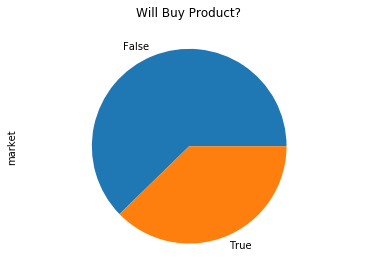

In [80]:
data['market']=data.apply(lambda x: True if (x['AI3']==7 or x['AI3']==4 or x['VA']==1) and x['Pos']==True
                         else False, axis=1)
mar_counts=np.bincount(data['market']).astype(float)
print('\n'+'Will Not Buy %: ' + str((mar_counts[0]/len(data))*100) + '%' + '\n')
print('Will Buy %: ' + str((mar_counts[1]/len(data))*100)+'%' + '\n')
data.market.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title("Will Buy Product?"+'\n')

So the majority of people in my dataset won't buy my product, but now that I've made this information, I can start working on how to use it to make some money on my product.

Let's suppose my costs are as follows:
* Manufacturing Cost = $300 per unit


* Advertising Cost (buying ads to market to a potential customer) = $0.50 per customer


* Sir-phia Price = $1,000 per unit

Based on this information, I can generate a cost-benefit matrix that looks like this:


|                 | Buy      | Won't Buy |
|   ------        |:-------- |:---------:|
|**Contact**      |    999.5 |       -.5 |
|**Don't Contact**|     0 |         0 |

Below we have a confusion matrix using Logistic Regression.

In [81]:
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y = data['market']
X = data.drop(['market', 'AI3', 'Pos','AI', 'AI4', 'Tests', 'cluster'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

model1 = LogisticRegression(penalty='l1')
model1.fit(X_train,y_train)
y_pred= model1.predict(X_test)

score=accuracy_score(y_test,y_pred)
matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
print('\n' + str(matrix) + '\n')
print(score*100)
X_train.head()


[[15  4]
 [ 2  4]]

76.0


,Age,Gender,Academic,Political,Education,Intelligence,AI1,Films,Sentiment,AI2,VA,Other,yng,Ac_cats,deg,lib
119,41,1,6.0,4,14,0,2,60.0,3,False,True,True,False,0,1,1
101,43,1,6.0,6,16,2,1,37.0,3,True,False,False,False,0,1,3
12,24,0,2.0,1,18,1,2,3.0,4,False,False,False,True,1,2,0
73,37,0,5.0,1,15,0,0,20.0,7,True,True,True,True,2,1,0
41,45,0,2.0,4,17,2,2,10.0,5,True,True,True,False,1,2,1


Now 'market' is my new target, but to be slightly more realistic my independent variables need to not include things my company probably wouldn't know, such as what people thought was the best example of AI, or their overall sentiment. I could probably find out if people use virtual assistants, their political standing, gender, age, education level and type.

It is also important to note that model accuracy will not match previous analysis. Because I have a different target feature, I had to split the data into training and testing sets once again.


#### Model Comparision Using Expected Value

Previous model comparisions were using accuracy, which simply looks at the number of errors a model makes, rather than the types of errors. As we can see from the cost benefit matrix though, particularly in business errors are costly, and what kinds of errors the model makes matters. Expected value is another method of comparing models.

In [82]:

cm=matrix
def binary_ev(conf_mat, cost_mat):
    total=cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]
    tp=cm[0][0]/total
    fp=cm[0][1]/total
    fn=cm[1][0]/total
    tn=cm[1][1]/total
    ev= tp*cost_mat[0][0]+fp*cost_mat[0][1]+fn*cost_mat[1][0]+tn*cost_mat[1][1]
    return ev

cbm=[[999.5,-.5],
    [0,0]]
print('Expected Value: ' +str(binary_ev(cm,cbm)))

Expected Value: 599.62


So this is the expected value using the Logistic Regression confusion matrix. Below we have the expected value using cost benefit information. And in this instance it looks like using the 'l1' penalty gives us about the same results.

In [83]:
model = LogisticRegression(penalty='l1')
model.fit(X_train,y_train)
y_pred= model.predict(X_test)
score = sklearn.metrics.accuracy_score(y_test, y_pred)
matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)

print('\n' + str(matrix) + '\n')
print("Model Accuracy: " +str(score*100)+'\n')
print('Model EV: ' + str(binary_ev(cm,cbm)))


[[15  4]
 [ 2  4]]

Model Accuracy: 76.0

Model EV: 599.62


I'm just using the baseline model for decision trees, which is probably unfair as I looked at complexity on a training testing split dataset before.

In [84]:
model = DecisionTreeClassifier(max_depth=1)
model.fit(X_train,y_train)
y_pred= model.predict(X_test)
score = sklearn.metrics.accuracy_score(y_test, y_pred)
matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)


score = sklearn.metrics.accuracy_score(y_test, y_pred)
matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
print('\n' + str(matrix) + '\n')
print("Model Accuracy: " +str(score*100)+'\n')

cm=matrix
def binary_ev(conf_mat, cost_mat):
    total=cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]
    tp=cm[0][0]/total
    fp=cm[0][1]/total
    fn=cm[1][0]/total
    tn=cm[1][1]/total
    ev= tp*cost_mat[0][0]+fp*cost_mat[0][1]+fn*cost_mat[1][0]+tn*cost_mat[1][1]
    return ev

cbm=[[999.5,-.5],
    [0,0]]
print('Expected Value: ' +str(binary_ev(cm,cbm)))


[[10  9]
 [ 0  6]]

Model Accuracy: 64.0

Expected Value: 399.62


In [85]:
model = LinearSVC()
model.fit(X_train,y_train)
y_pred= model.predict(X_test)
score = sklearn.metrics.accuracy_score(y_test, y_pred)
matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)

print('\n' + str(matrix) + '\n')
print("Model Accuracy: " +str(score*100)+'\n')
cm=matrix
def binary_ev(conf_mat, cost_mat):
    total=cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]
    tp=cm[0][0]/total
    fp=cm[0][1]/total
    fn=cm[1][0]/total
    tn=cm[1][1]/total
    ev= tp*cost_mat[0][0]+fp*cost_mat[0][1]+fn*cost_mat[1][0]+tn*cost_mat[1][1]
    return ev

cbm=[[999.5,-.5],
    [0,0]]
print('Expected Value: ' +str(binary_ev(cm,cbm)))


[[18  1]
 [ 2  4]]

Model Accuracy: 88.0

Expected Value: 719.62


So even though support vector classification doesn't usually have the highest accuracy score, it has the highest expected value (usually) because it classified a lot of our positive cases (people who will buy our product) correctly and doesn't classify anyone in the false positive, most costly catagory. Thus svc would be the model I should use in trying to make the most money off of targeting the correct customers.

Note: Every time I run the cells things change, but consitently the EV is much higher than the other models (719.64).

I do like though that this business approach looks at the specific kinds of errors the model makes, as some are more costly than others. It's an interesting, different method of model evaluation.

#### Profit Curve

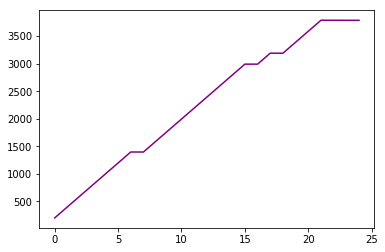

In [86]:
model=LogisticRegression()
model.fit(X_train,y_train)
def binary_ev(mat1, ben):
    mat2 = ben
    return mat1[0] * mat2[0] + mat1[1] * mat2[1] + mat1[2] * mat2[2] +  mat1[3] * mat2[3]

cbm=[199.5,-.5,0,0]
def profit_curve(model, X_test, y_test,cbm):
    dd = X_test.copy()
    dd['y_test'] = y_test
    dd['y_pred'] = (model.predict_proba(X_test))[:,0]
    dd = dd.sort_values('y_pred',ascending=False)
    tp = 0
    fp = 0
    fn = len(dd[dd['y_test'] == 0])
    tn = len(dd[dd['y_test'] == 1])
    ev = []
    for i in range(0, len(dd)):
        if (dd.iloc[i]['y_test'] == 0):
            tp = tp+1
            fn = fn-1
        else:
            fp = fp+1
            tn = tn-1
        ev.append(binary_ev([tp,fp,fn,tn],cbm))
    return ev
        
plt.plot(range(0, len(X_test)),profit_curve(model, X_test, y_test,cbm), c="purple")

For all the models the graph is roughly the same, I just chose Logistic Regression for simplicity. This isn't much of a profit "curve" due to the tiny tiny size of my dataset. In general with my customers though, the lower our threshold and the more people we market to is, the more money we make. With more instances presumably this would smoothe out to be a more conventional looking profit curve.



## Conclusion

Based on this analysis, I can primarily conclude that my data is not particularly rich when it comes to analysis and I did not do a good job of collecting features that indicate how my participants felt about artificial intelligence. I had hypothesized that factors such as level of education, field of study, general knowledge about AI would have stronger positive correlations and impacts on predictions then they ultimately did. I also thought the number of AI containing films someone had watched would negatively impact their overall sentiment, however this didn't show up in my sample either.

However it is interesting, and a little disturbing, that the feature 'brain' which was created to encompass people who knew they have contact with AI daily and did not choose the fake intelligence definition was the one that had the highest correlation and the decision tree used to predict whether people felt positively about AI or not. Essentially, those people who knew AI techniques are already prevelant in our lives had more positive/optimistic feelings about AI in general. This makes sense practically, life isn't so radical with AI as we have it, but if someone didn't know that then they might hold mental images of a scary and extream future, even though that's rarely how the world works. However this could be a third variable instance, as many of my participants work in formal sciences. It's probably good that quasi-independent variables such as gender, age, etc didn't impact overall sentiment. 

Overall, my attempt at AI knowledge-base assesment did not pan out as well as I hoped, but it did give me some interesting features to work with that I wouldn't have collected without that goal in mind.

### Limitations and Discussion

My results most concretely confirm that I don't know how to make surveys and collect data. Rather than just collecting the typical features I usually see in datasets such as gender, age, etc. my goal was to be a little more creative and less straight forward for a couple of reasons. Primarily, I was working with the limitation that I'm using relatively simple computational methods to analyze my data, which requires numerical features or features which can be easily converted into numerical values. Due to this the responses were limited to what closed ended questions I came up with from my very basic knowledge of AI. In the future, it would be good to survey participants using open ended questions as well as collecting a sentiment score and other numerical features, then use text mining techniques to analyze responses. I considered doing this and coding answers by hand, but due to the number of responses I ended up with I'm glad I didn't make that mistake, as this project would have take exponentially longer than the massive amount of work I've already put into it. I also think it would have made the survey more difficult to take, and I would have gotten fewer responses had it been open ended.

Another major limitation were several features of the survey itself. There was no information I could get my hands on about how people feel about AI, what people know about AI, I even had a hard time finding a comprehensive list of what counts as AI. Thus I was shooting in the dark when it came to constucting this survey. If I had been more prudent and had more time, I would have gotten some guidence from faculty members, peers, or reached out to experts who know more about this topic. Instead I rushed to get my survey out and start my analysis, and thus I think my data is far less interesting than it potentially could have been.

The most obvious mistake I made with the survey was pointed out by one of the techie participants. I gave the option on all of my scale questions for a neutral response. In general, I personally usually prefer a neutral response option, but as we saw in my initial data exploration this made engineering my target feature very difficult and ultimately untrue no matter where you choose to classify neutral responses as booleans.

The distribution of this survey was absolutely deplorable as well. Many of my responses were from a specific tech oriented community, and they most certainly shifted my demographic. The other portion consisted primarily of random Facebook connections. These two very polar groups made my dataset larger and more interesting in the sense of complexity, but I also don't think they do a good job of representing the general population. There were also a couple responses that were fake, people just attempting to be outliers. I guess that's what happens when you ask students at this university to take something seriously.

Some other features it might be useful to collect in the future could be nationality, mobile operating system preference (Android vs Apple), self-reported technical competence, etc. One participant pointed out that he had read more AI containing books than seen movies, so this might be interesting data to collect as well, although the demographic I originally thought would take the survey generally doesn't enjoy reading in my experience. A more thorough assesment of participant knowledge-base and more individuals in the dataset would be crucial as well.

### Concluding Remarks
* Understading that AI is more than the widely marketed technology we know today and have seen in sci-fi for years has the largest impact of the features I collected on how positively people felt about artifical intelligence.


* "Normal" quasi-independent variables (age, gender, even education and academic field to some extent) don't have much of an impact on sentiment, which is promising in my opinion. We don't have any issues with women or people with less education being afraid of AI from my very limited data.


* Although my data was mostly numerical, it is malleable with [feature engineering](#Feature-Engineering), and how data is visualized may not always be the most accurate or straightfoward representation of the results. I think this is a very very important point to remember, as data science is incredibly popular right now and will probably continue to be for a long time. If we can be more aware of the nature of data and how easily it can be manipulated, we can be think more critically when presented with data in academia, business, science, and day to day life.

Overall, most of my struggles with this project were due to the nature of my data, which I collected, so that rests solely on me. More individuals would have been nice, but it took me about three weeks of surveying to get 122 individuals, and at that point I had exhausted all my resources for getting more data, so more time wouldn't have helped anything other than my peace of mind. My mostly limited understanding of Python and the nuances of how computers process data also made things difficult. Plus we've covered a multitude of techniques in this course, so I may well have missed some.

The most frustrating thing was the general lack of consistency in results, but given my dataset size this was unavoidable. I also can't stand low accuracy on my models. I have a difficult time accepting that the point of data science is not to perfectly predict every instance, as then it's overfitting. 

My hypothesis that more knowledge contributes to a higher sentiment was ultimately supported however, as seen in the correlation to 'AI2' and therefore 'brain'. Even though my overcomplicated artifical intelligence awareness assesment fell through in the end, it appears that knowledge does reduce fear. While this analysis wasn't as interesting as some larger datasets we've seen or as I would have hoped, it gave me some interesting, unconventional information to work with, and I know that, as the author John Green wrote, “What I love about science is that as you learn, you don't really get answers. You just get better questions.”

I am certainly full of questions.
